# ADVANCED REGRESSION: HOUSING PRICE PREDICTION
# BY RANJEET SINGH MAHLA
# DATE 10 February 2023

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Objectives

(1) Which variables are significant in predicting the price of a house
(2) How well those variables describe the price of a house.
(3) Determine the optimal value of lambda for ridge and lasso regression.

 
## Business Goal 

>> You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



# PART-1: UNDERSTANDING DATA

IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')



##############
from matplotlib.pyplot import *
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os


###########
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [2]:
def countplot(features):
    plt.figure(figsize=(32, 16))
    for i in range(1,len(features)+1):
        plt.subplot(2,4,i)
        plt.xticks(rotation=90)
        sns.countplot(x = features[i-1], data = data)    
    plt.show()

CREATE DATAFRAME [READ DATAFRAME]

In [3]:
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# DATA DIMENTION
data.shape

(1460, 81)

In [5]:
#DATA COLUMN DETAILS [TYPE NON NULL ETC]
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# DATA DESCRIPTION
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
# MISSING VALUES 
print("% missing values in each column")
print(round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False))

% missing values in each column
PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
Sa

# REMOVE UNWANTED COLUMS

In [8]:
# hERE I AM REMOVING 6 COLUMNS; 5 COLUMNS HAVE MISSING VALUE >40% AND ID COLUM IS JUST A SERIAL NUMBER
data.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace = True)
data.drop('Id', axis=1, inplace = True)
# let see the data status
data.shape

(1460, 75)

In [9]:
# lets chack the missing or null or na value once more
print("% MISSING VALUE IN EACH COLUMNS")
print(round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False))

% MISSING VALUE IN EACH COLUMNS
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
KitchenQual       0.00
GrLivArea         0.00
TotRmsAbvGrd      0.00
Functional        0.00
MSSubClass        0.00
Fireplaces        0.00
ScreenPorch       0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
3SsnPorch         0.00
2ndFlrSF          0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageArea        0.00
GarageCars        0.00
LowQualFinSF      0.00
He

In [10]:
# lets have a look at data columns in details
data[['LotFrontage','GarageYrBlt','MasVnrArea']].describe().T


count         mean         std     min     25%     50%     75%  \
LotFrontage  1201.0    70.049958   24.284752    21.0    59.0    69.0    80.0   
GarageYrBlt  1379.0  1978.506164   24.689725  1900.0  1961.0  1980.0  2002.0   
MasVnrArea   1452.0   103.685262  181.066207     0.0     0.0     0.0   166.0   

                max  
LotFrontage   313.0  
GarageYrBlt  2010.0  
MasVnrArea   1600.0

In [11]:
# lets have a look at data columns in details
data[['GarageCond', 'GarageType', 'GarageFinish']].describe().T
data[['GarageQual', 'BsmtExposure', 'BsmtFinType2']].describe().T
data[['BsmtFinType1', 'BsmtCond', 'BsmtQual']].describe().T
data[['MasVnrType', 'Electrical']].describe().T

count unique    top  freq
MasVnrType  1452      4   None   864
Electrical  1459      5  SBrkr  1334

## DATA IMPUTATION FOR MISSING VALUENS AND OUTLIERS

In [12]:
data.shape

(1460, 75)

In [13]:
# REPLACEMENT OF OUTLIER WITH MEDIAN
data['MasVnrArea']= data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt']= data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

In [14]:
data['MasVnrArea'].describe()
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

<AxesSubplot: xlabel='GarageYrBlt', ylabel='Density'>

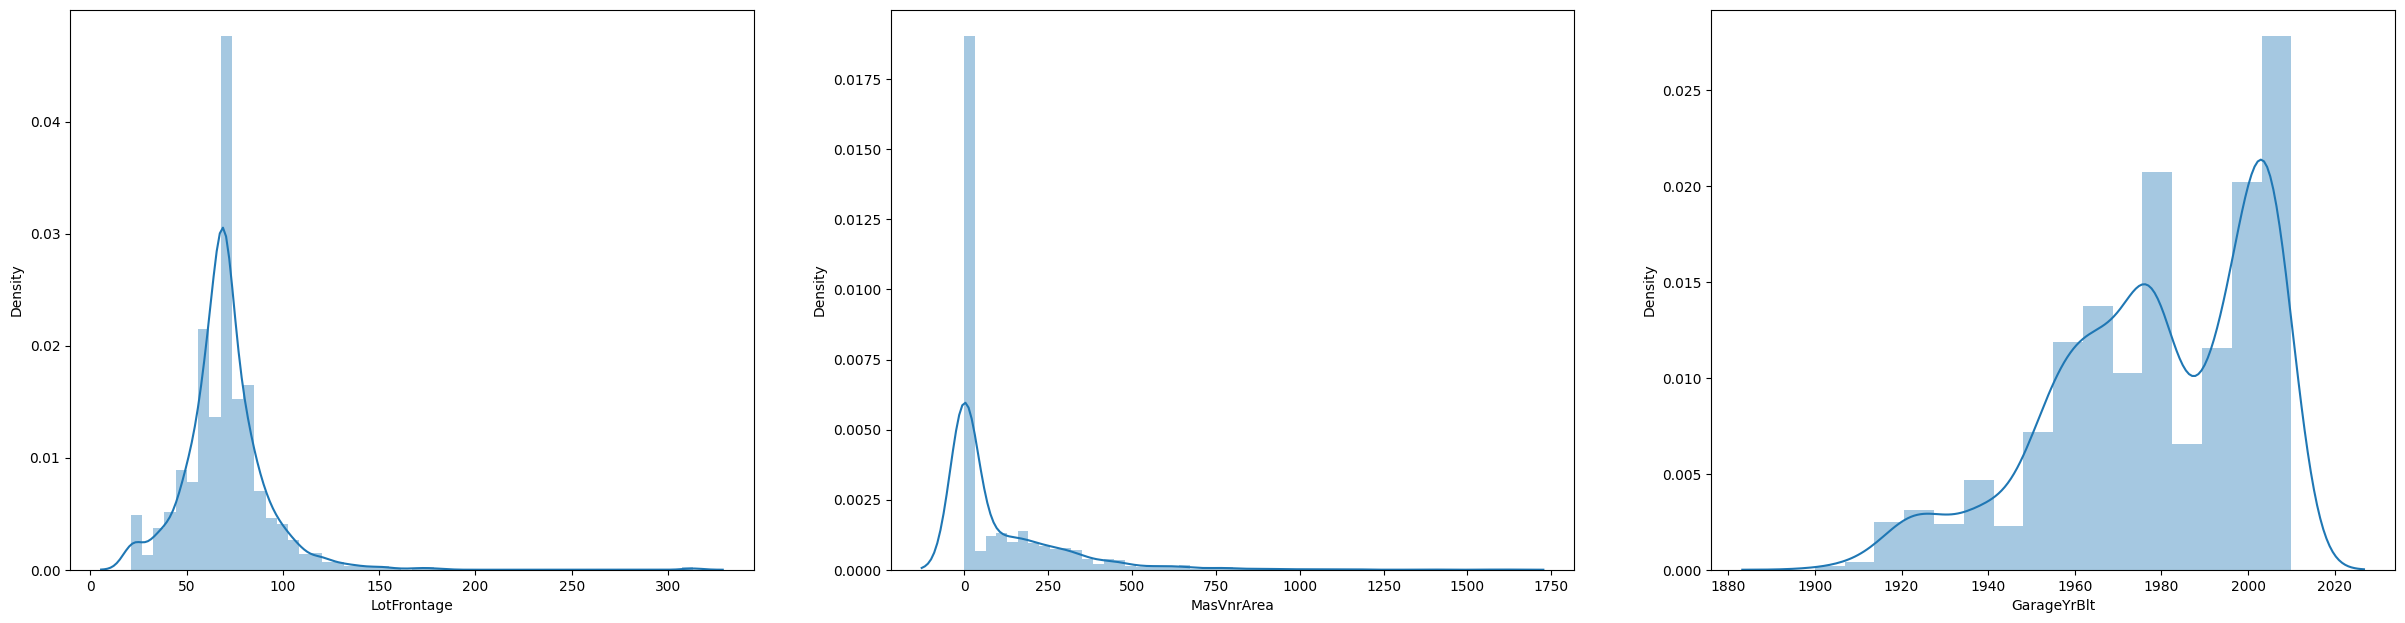

In [15]:
plt.figure(figsize=(30, 16))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])

In [16]:
## Imputation of garage variables 
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')

## Imputation of basement varaibles
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')

## imputation of other variables

data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None') 
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr') 

In [17]:
# TRANSFORMATION OF NUMERICAL VARIABLES INTO CATEGORICAL 
data['MSSubClass']= data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})


In [18]:
# TRANSFORMATION OF NUMERICAL VARIABLES INTO CATEGORICAL 
data['OverallQual']=data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})



In [19]:
# TRANSFORMATION OF NUMERICAL VARIABLES INTO CATEGORICAL 
data['OverallCond']=data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [20]:
# lets check the transformed data set
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     At

In [21]:
data.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.863699   10516.828082  1971.267808   1984.865753   103.117123   
std      22.027677    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    23.994583     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1962.000000     1.000000   334.500000     0.000000   
50%       1.000000  1978.506164     2.000000   480.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000

In [22]:
### missing value status after data imputation
print("% MISSING VALUE IN EACH COLUMNS")
print(round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False))

% MISSING VALUE IN EACH COLUMNS
MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSZoning         0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Ne

# EXPLORATORY DATA ANALYSIS

In [23]:
data.shape

(1460, 75)

In [24]:
categorical = data.select_dtypes(include=['object'])
categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Above Average'),
  Text(2, 0, 'Very Good'),
  Text(3, 0, 'Average'),
  Text(4, 0, 'Excellent'),
  Text(5, 0, 'Below Average'),
  Text(6, 0, 'Very Excellent'),
  Text(7, 0, 'Fair'),
  Text(8, 0, 'Very Poor'),
  Text(9, 0, 'Poor')])

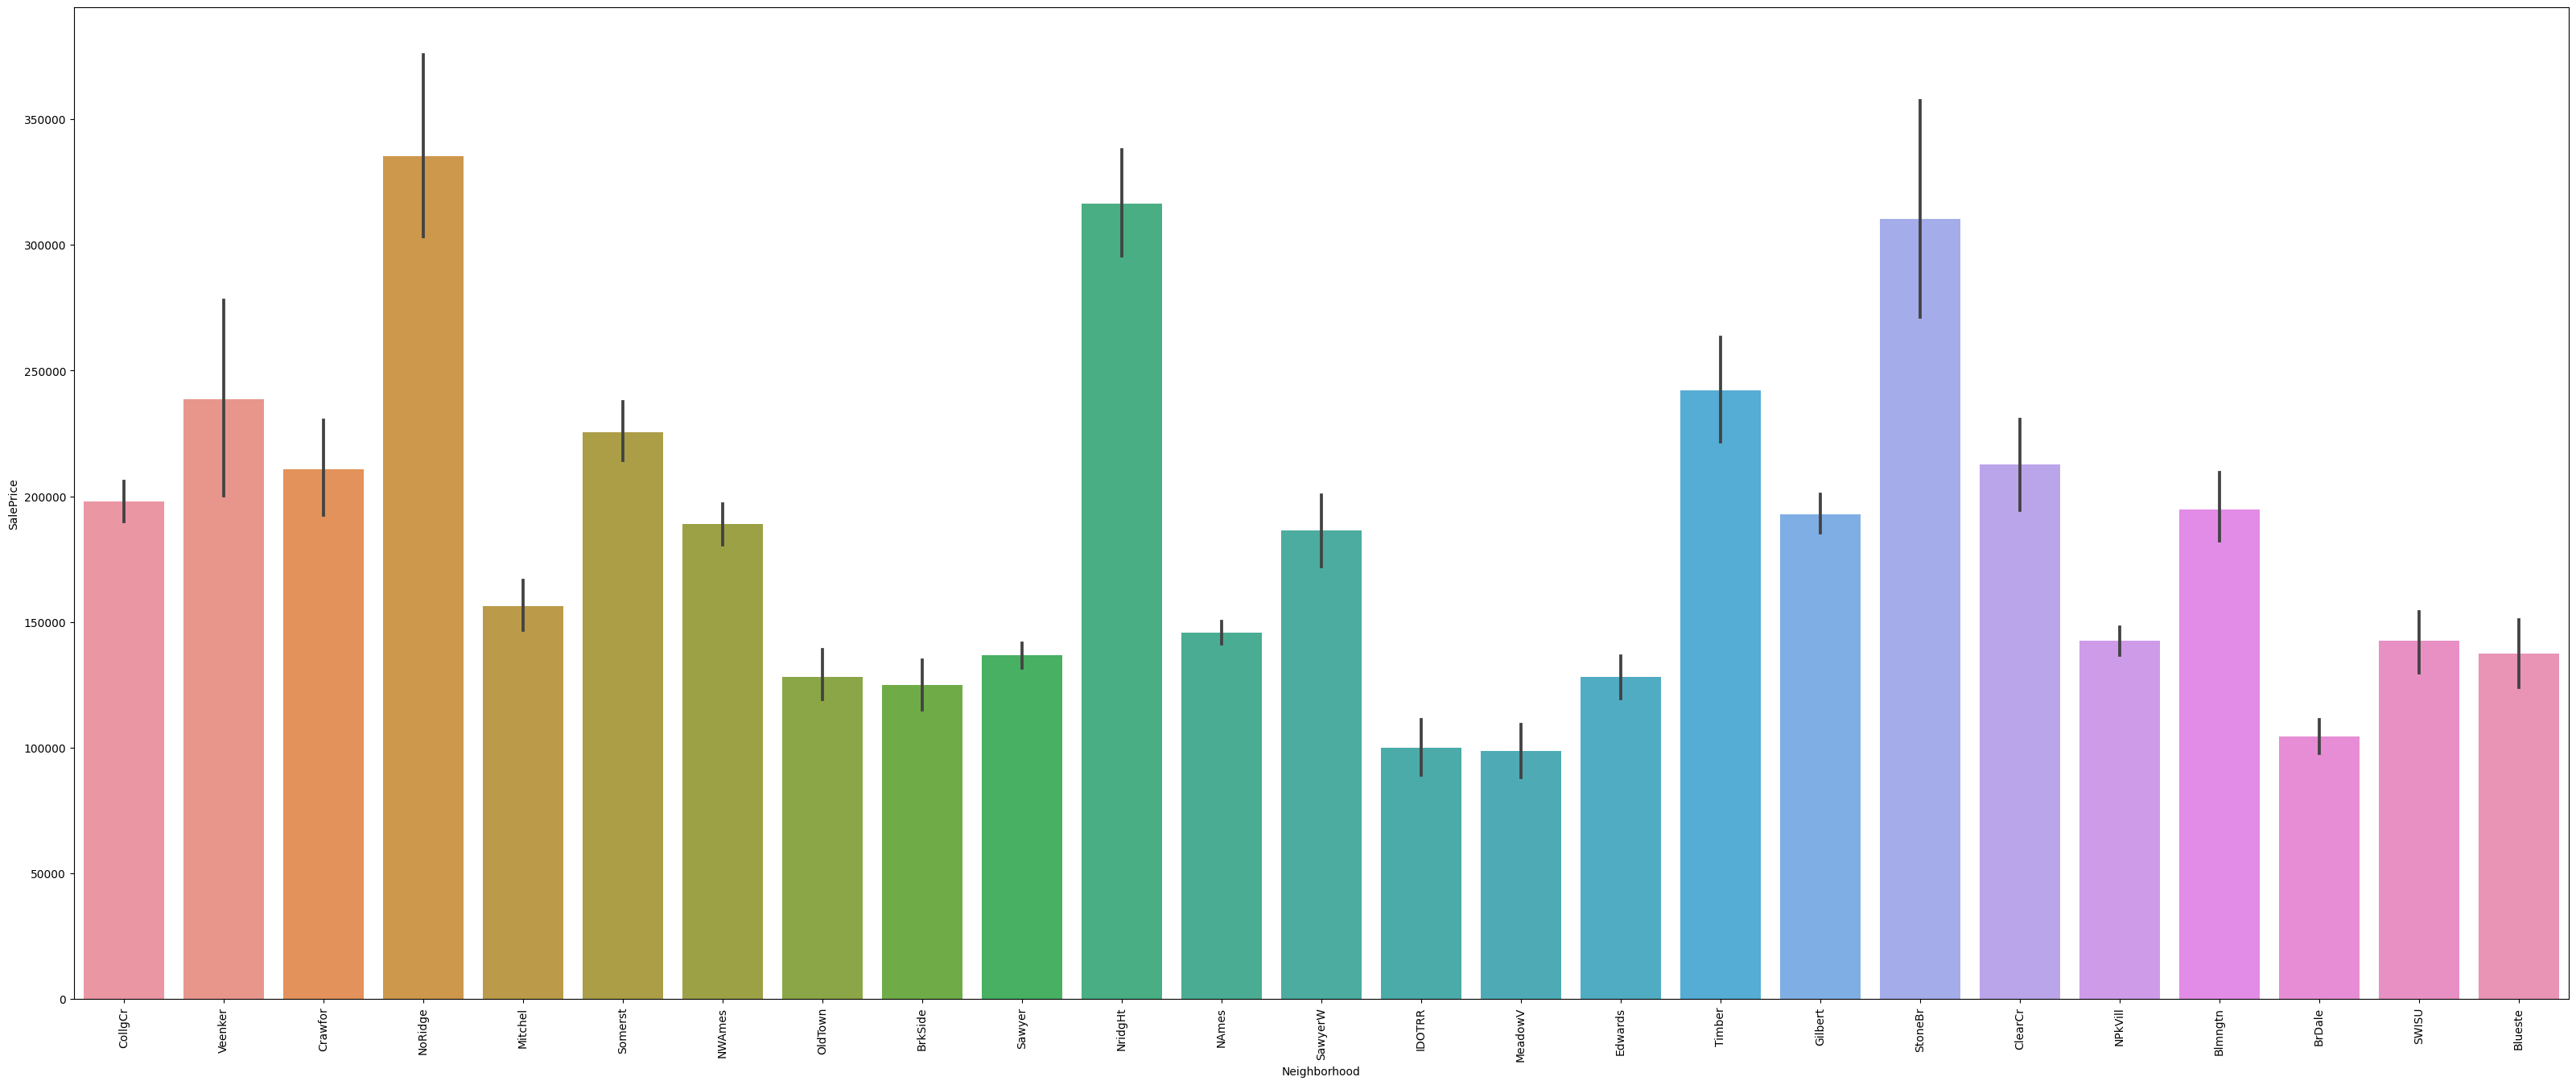

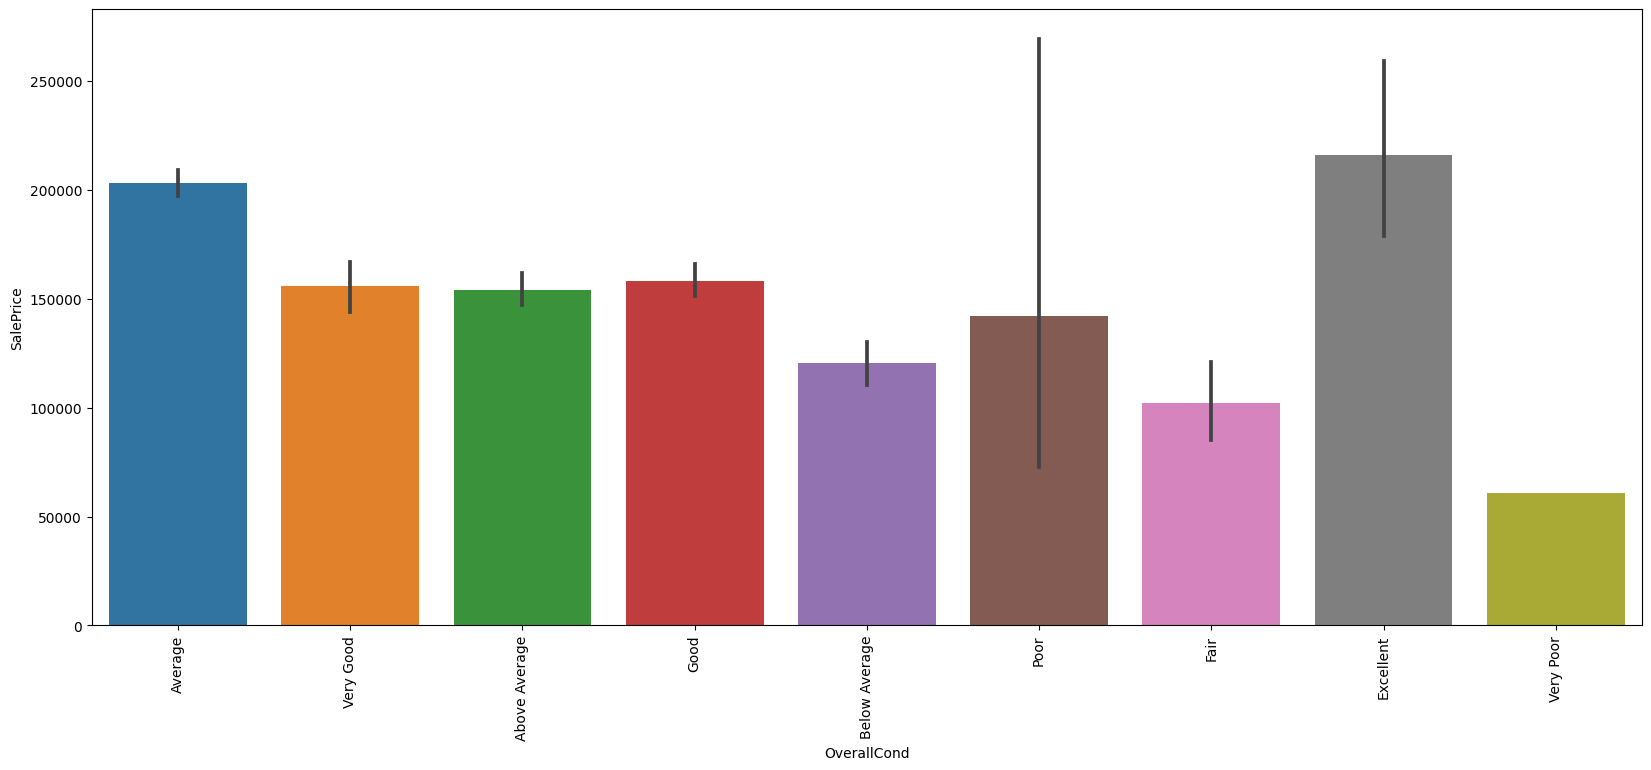

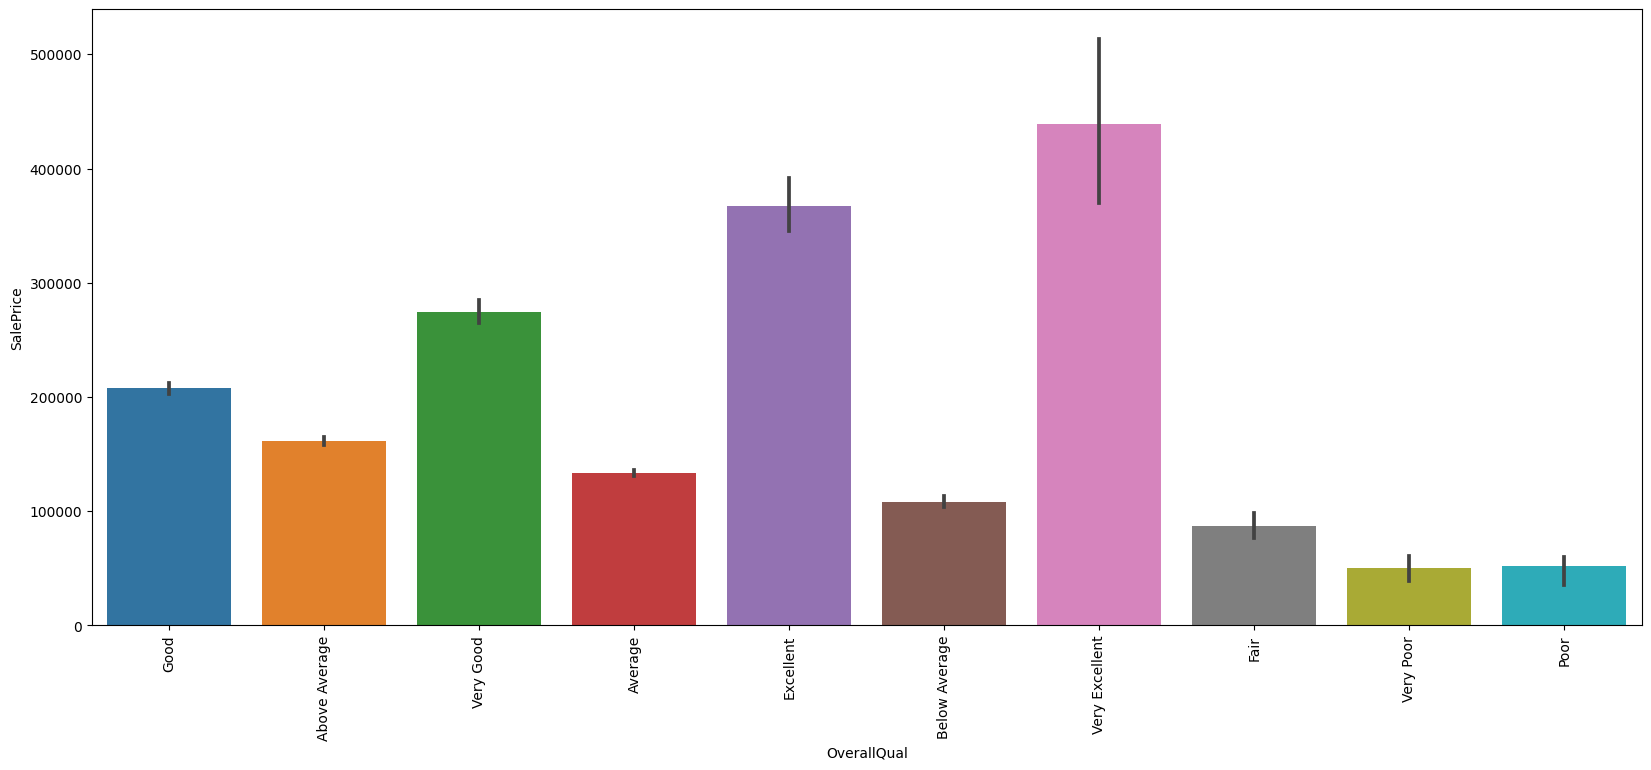

In [25]:
## BARPLOTS 

# Sale Price vs Neighborhood
plt.figure(figsize=(40, 16))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.xticks(rotation=90)

# OverallCond vs SalePrice
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.xticks(rotation=90)

# overall quality vs Saleprice
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

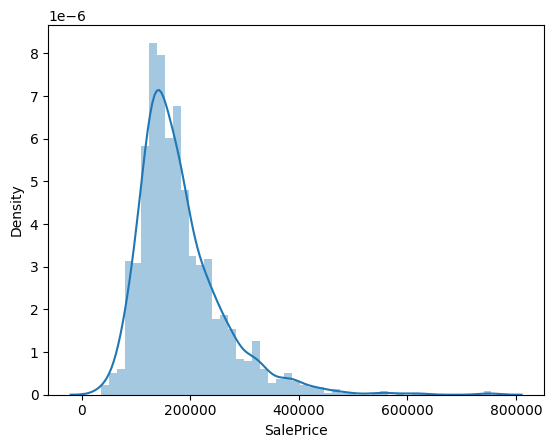

In [26]:
sns.distplot(data['SalePrice'])

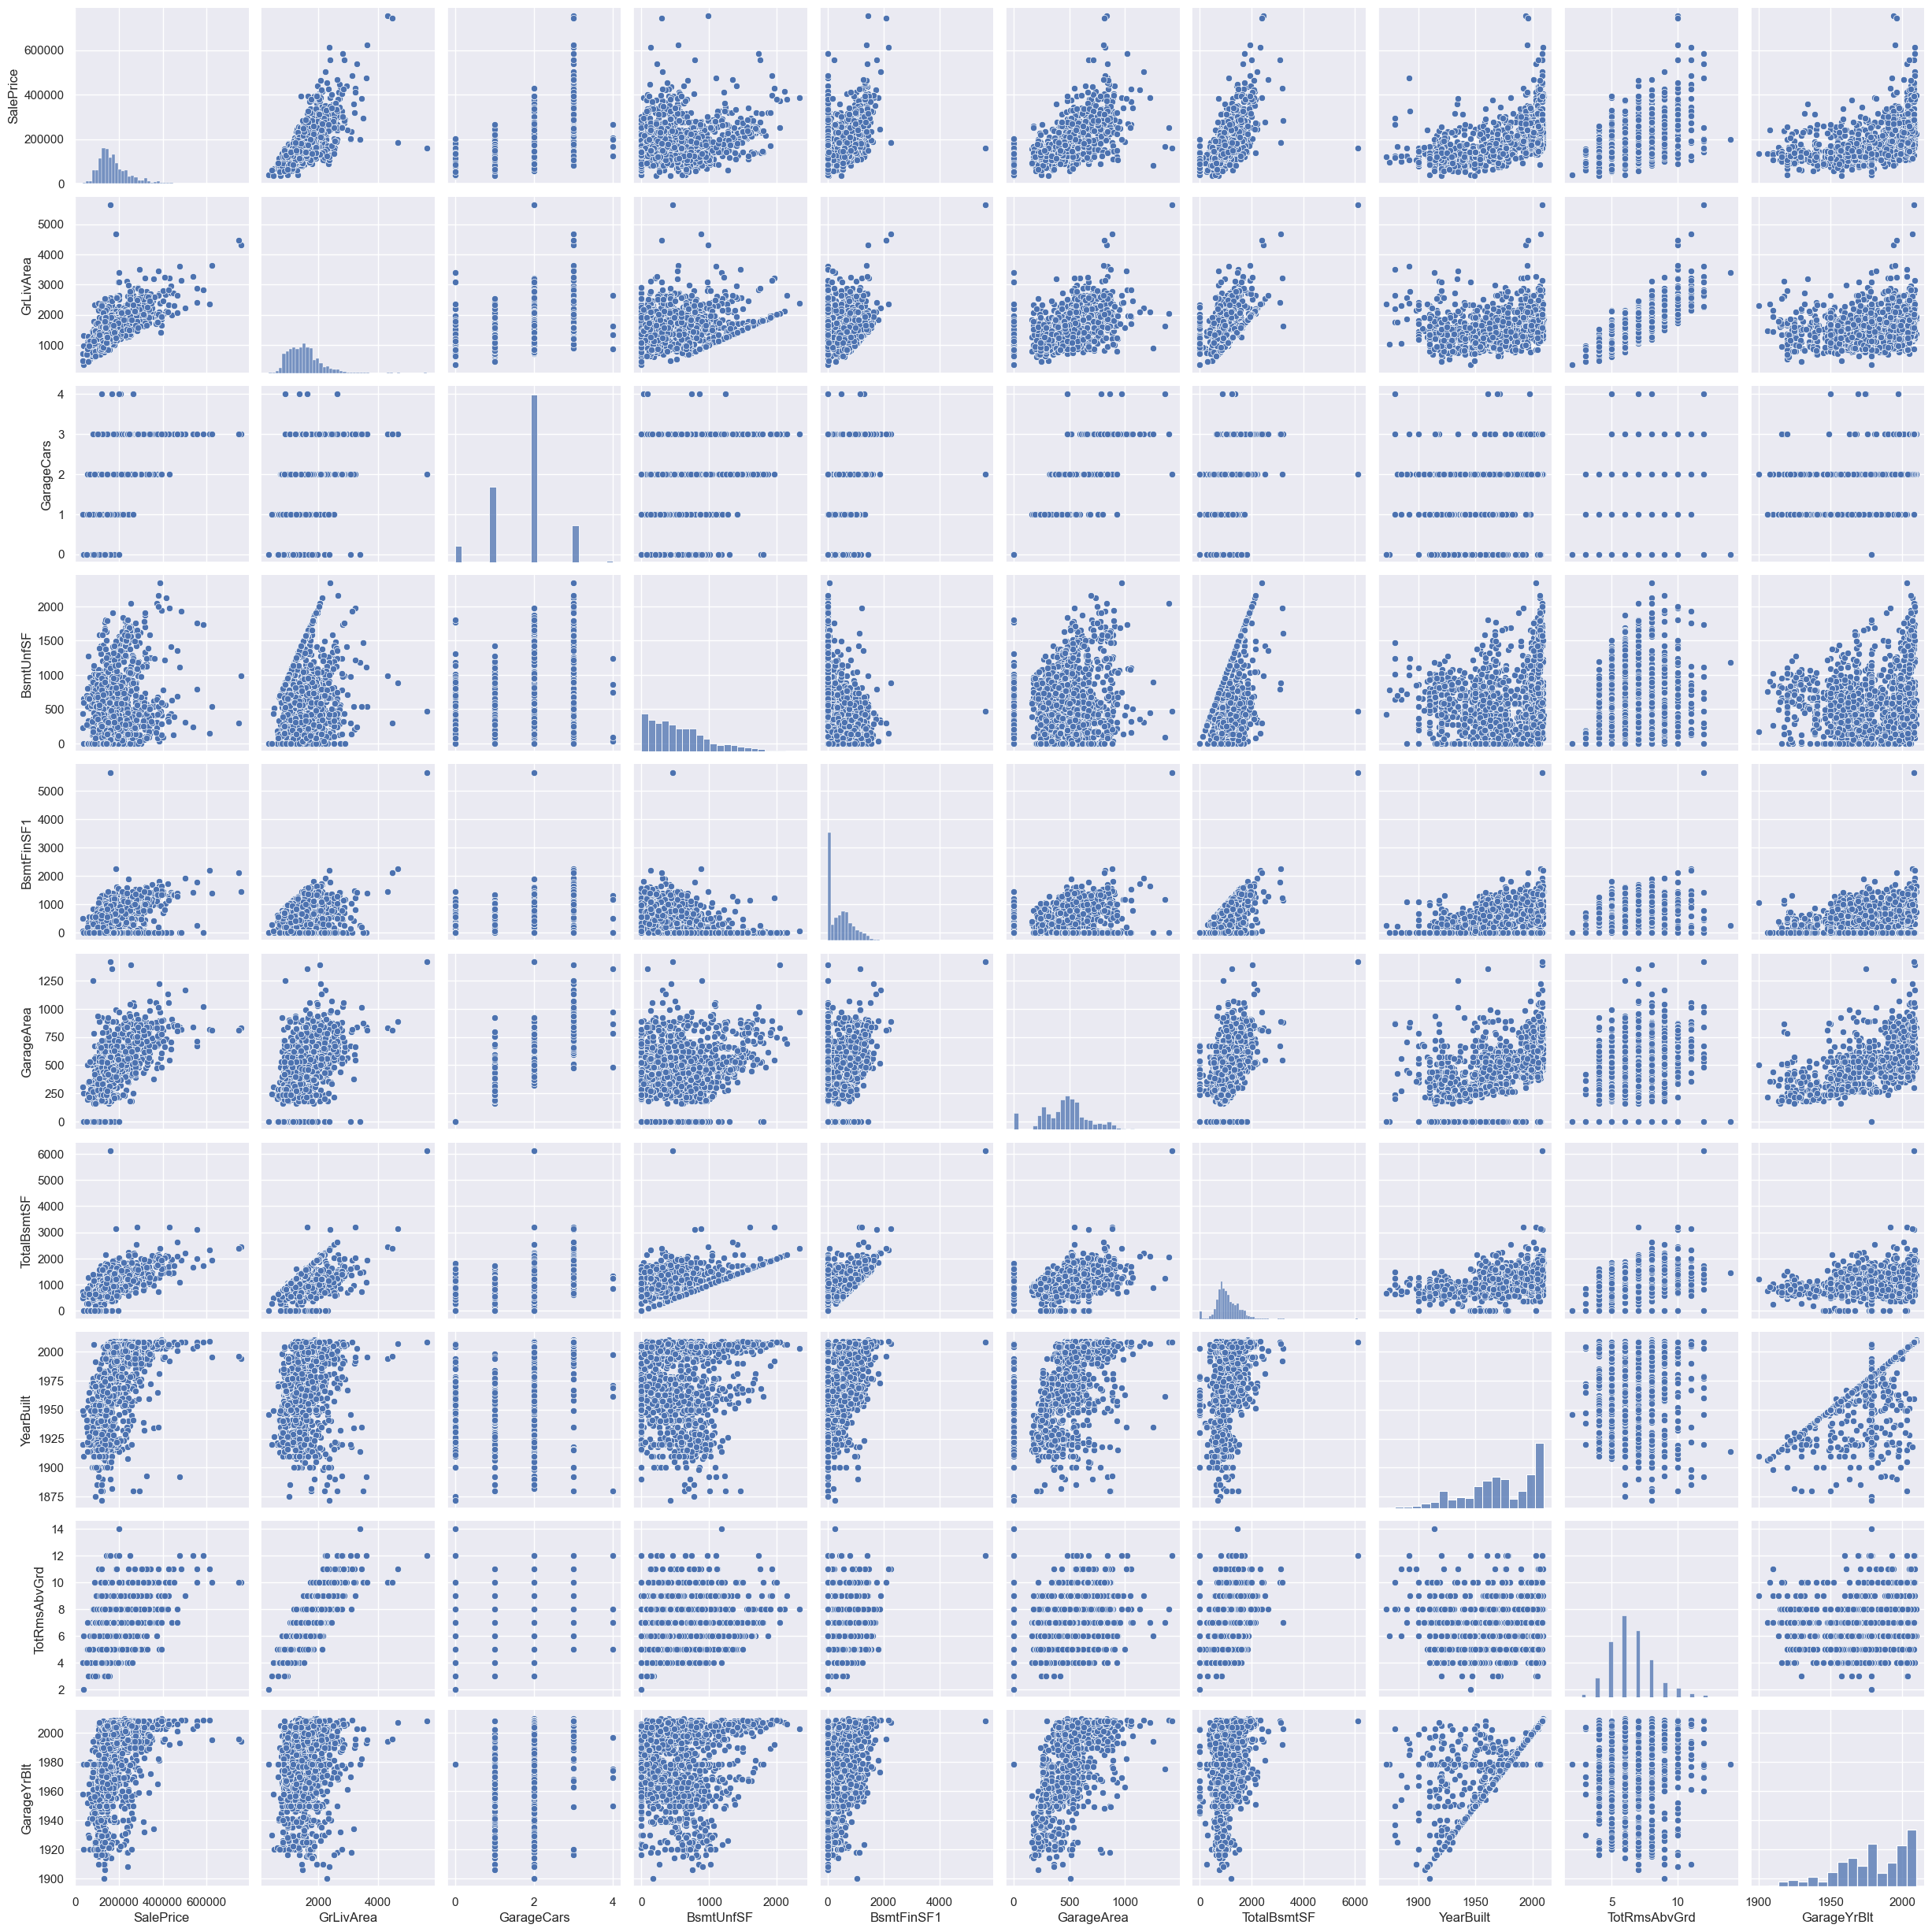

In [27]:
# PAIR PLOT
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

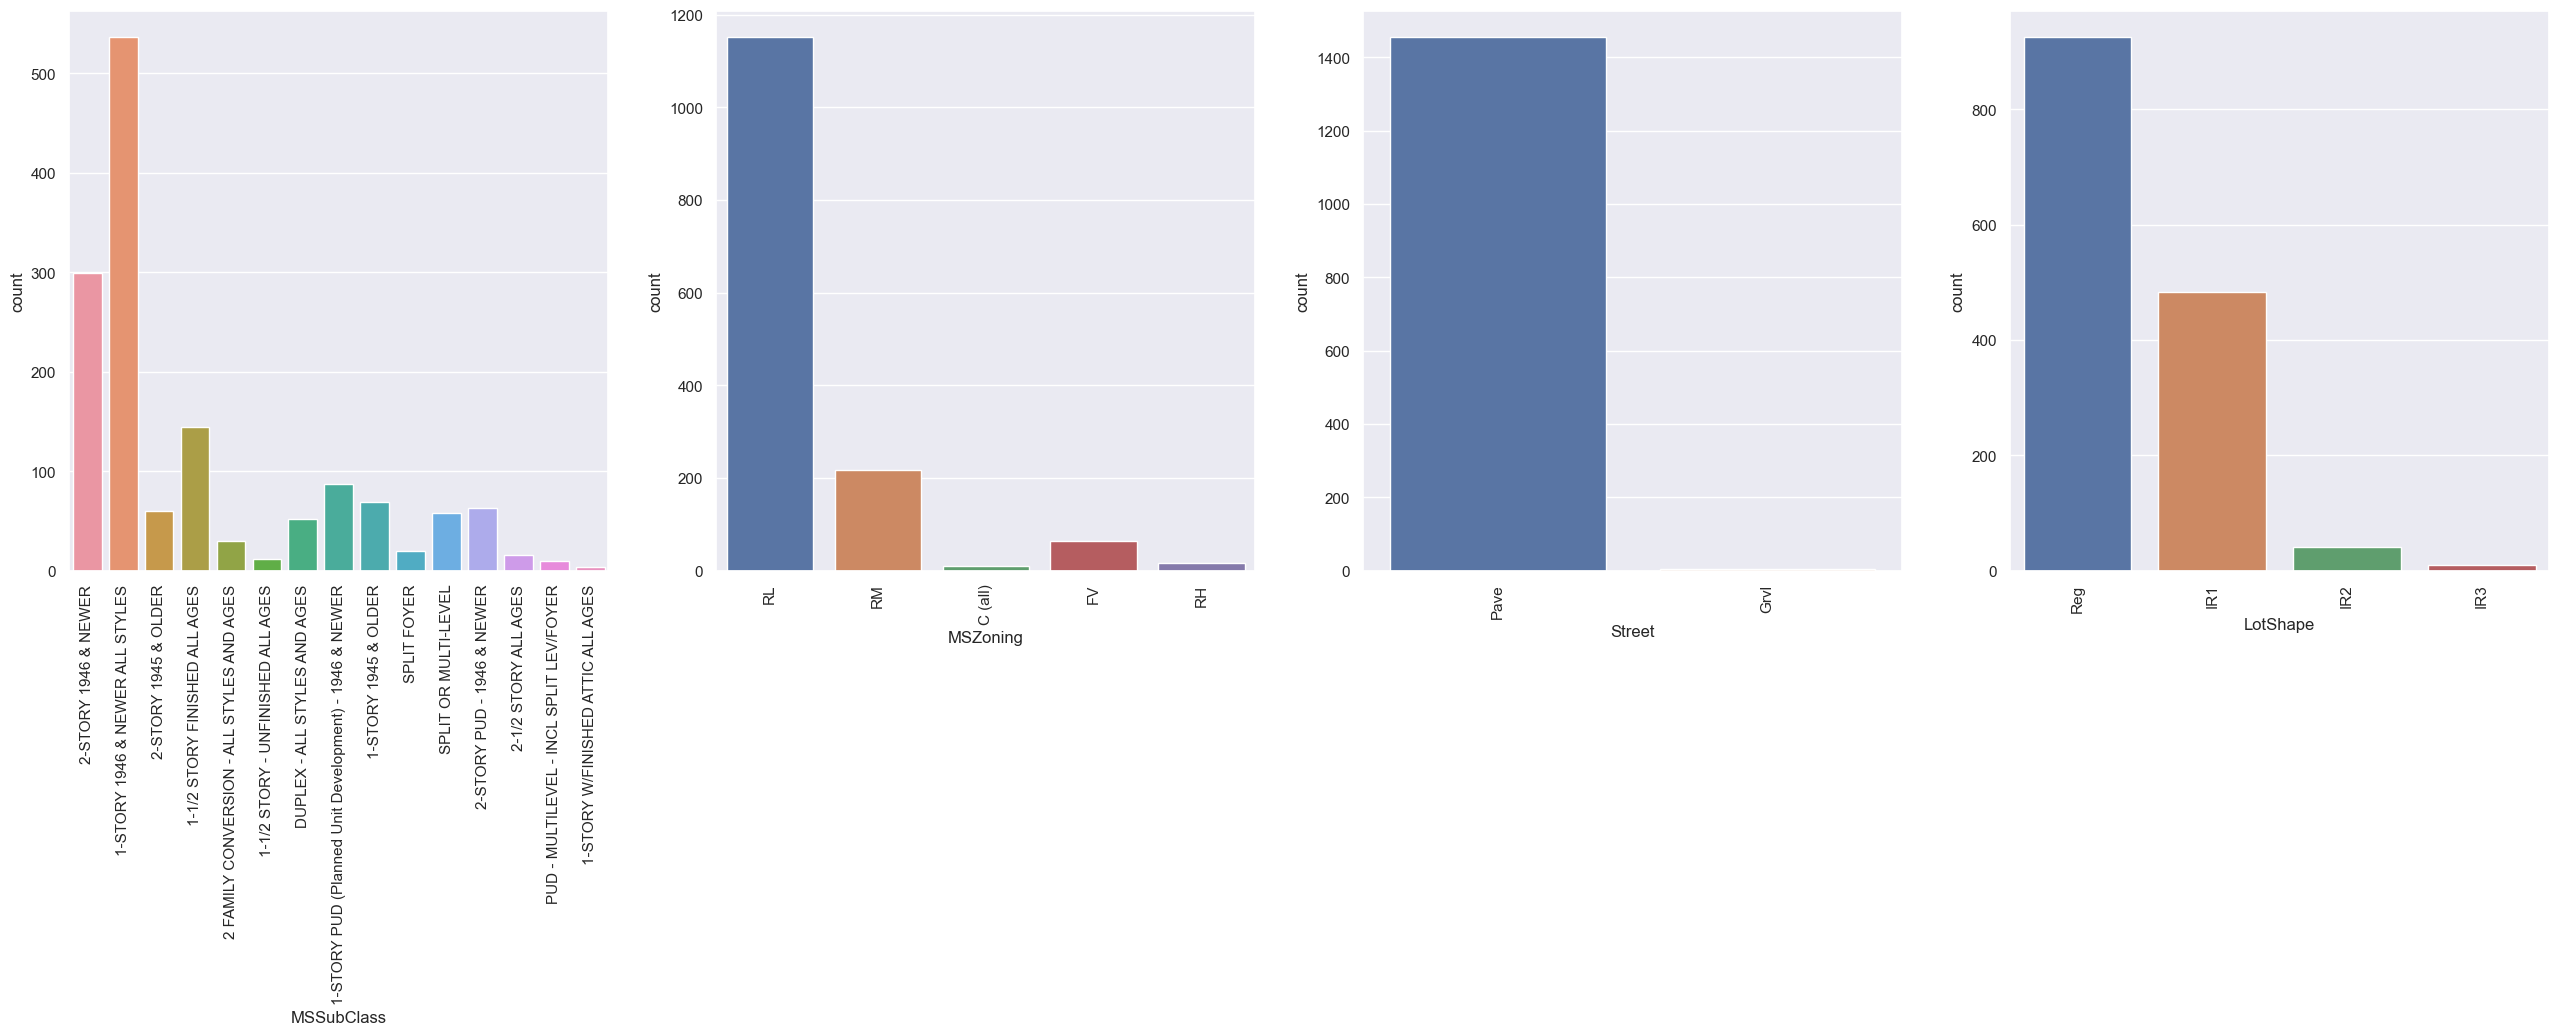

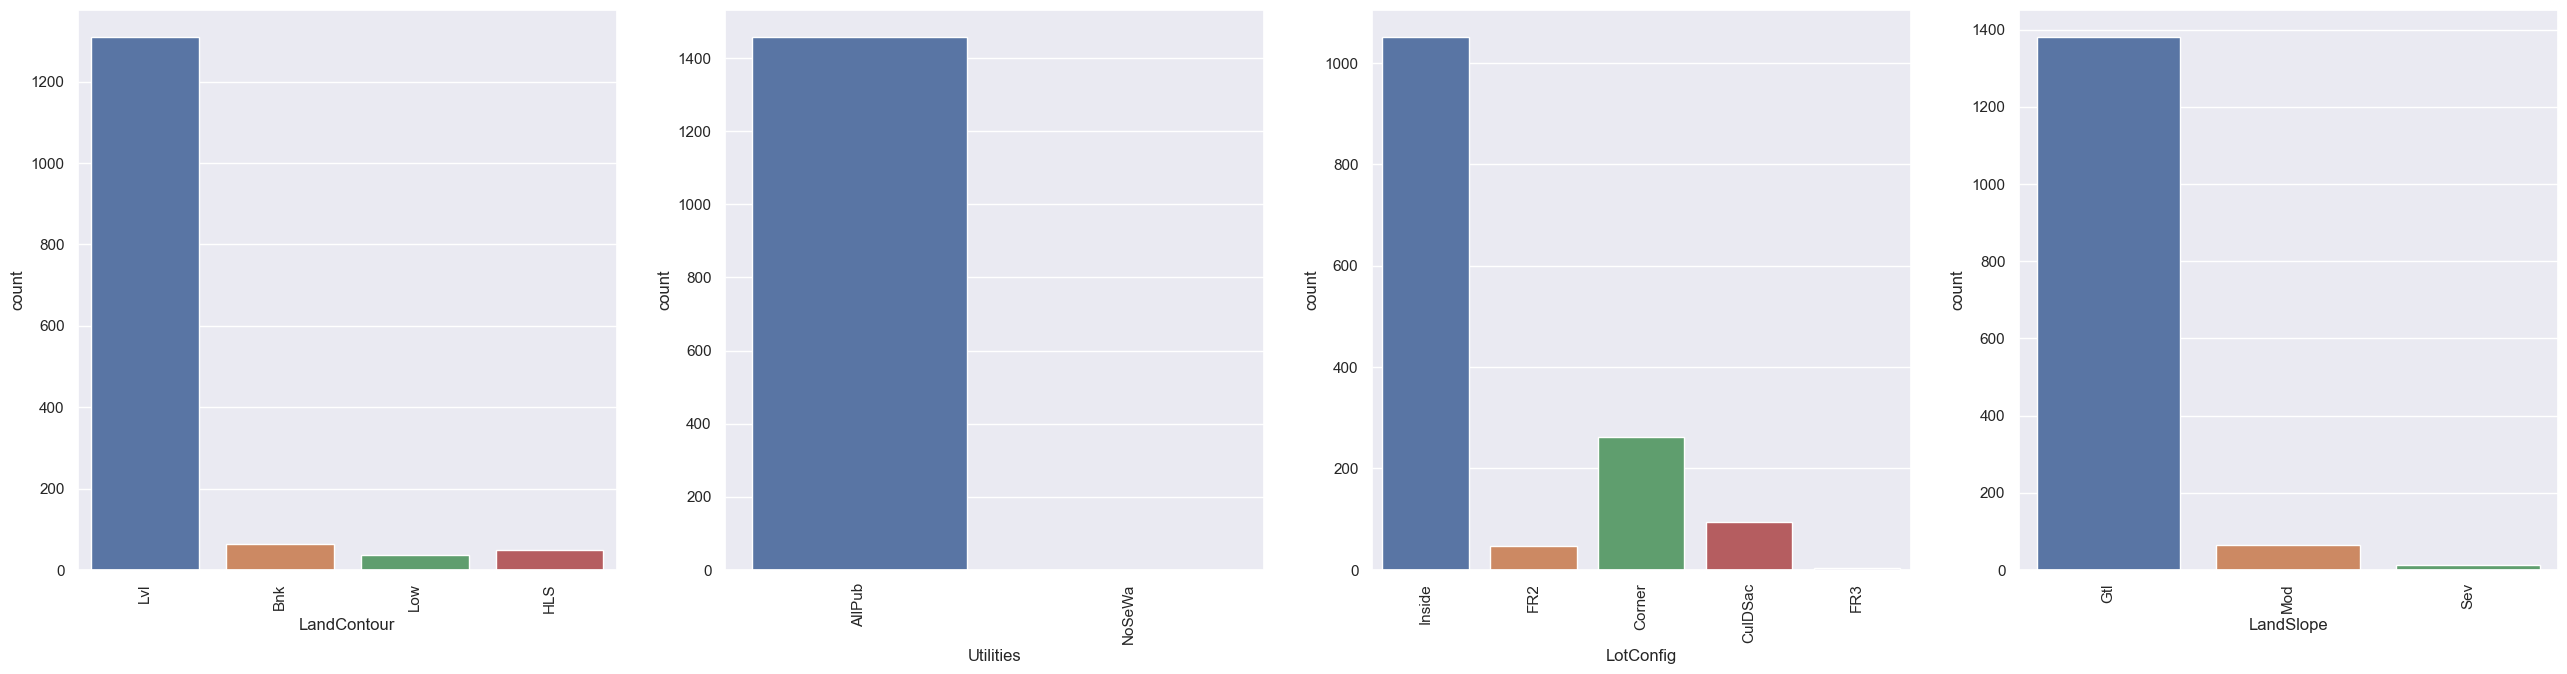

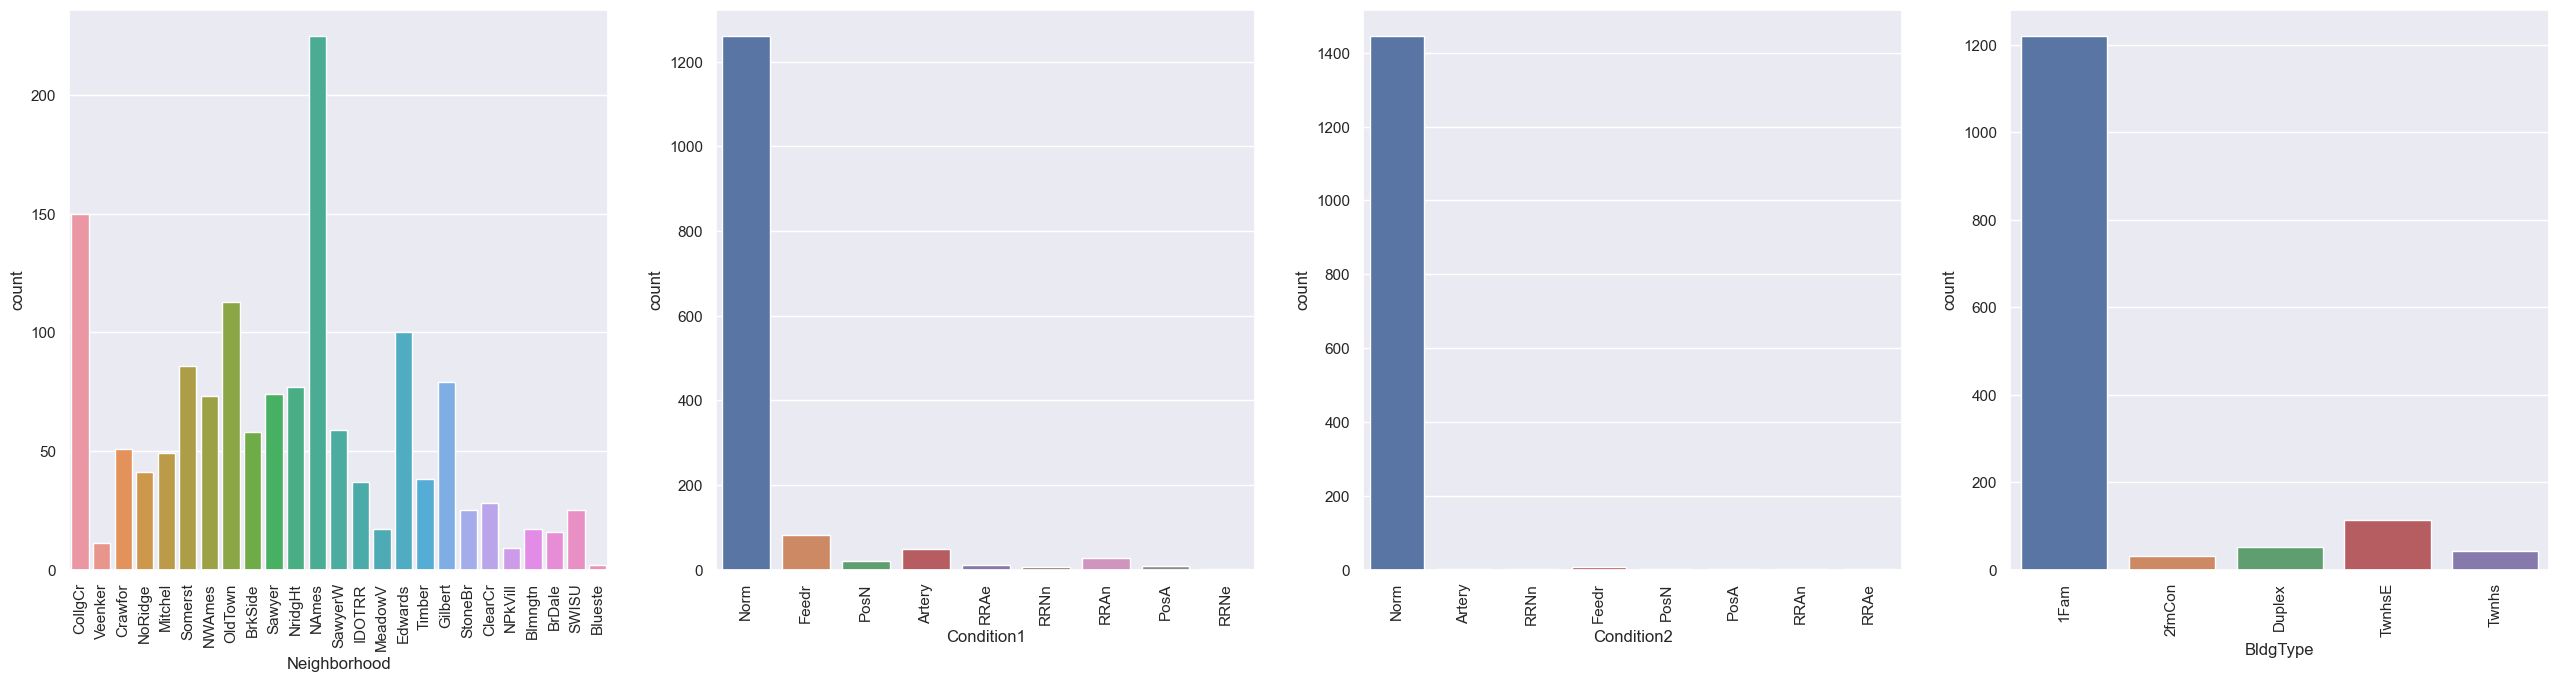

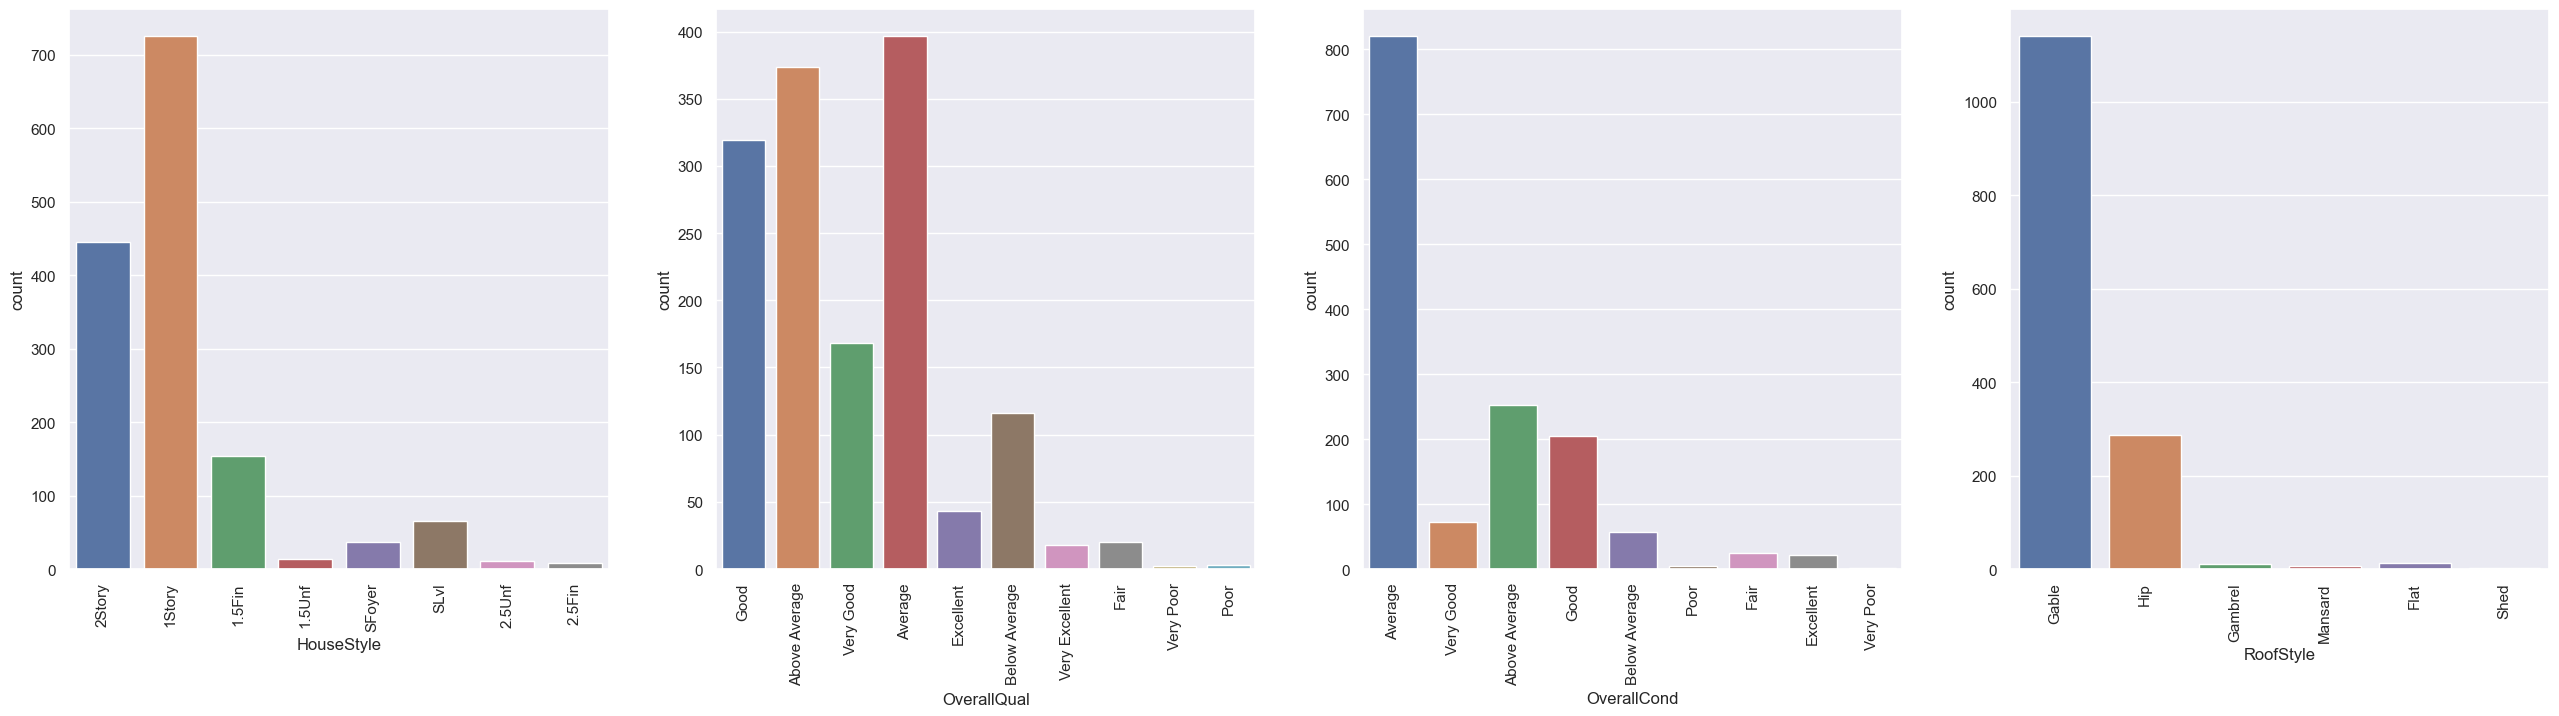

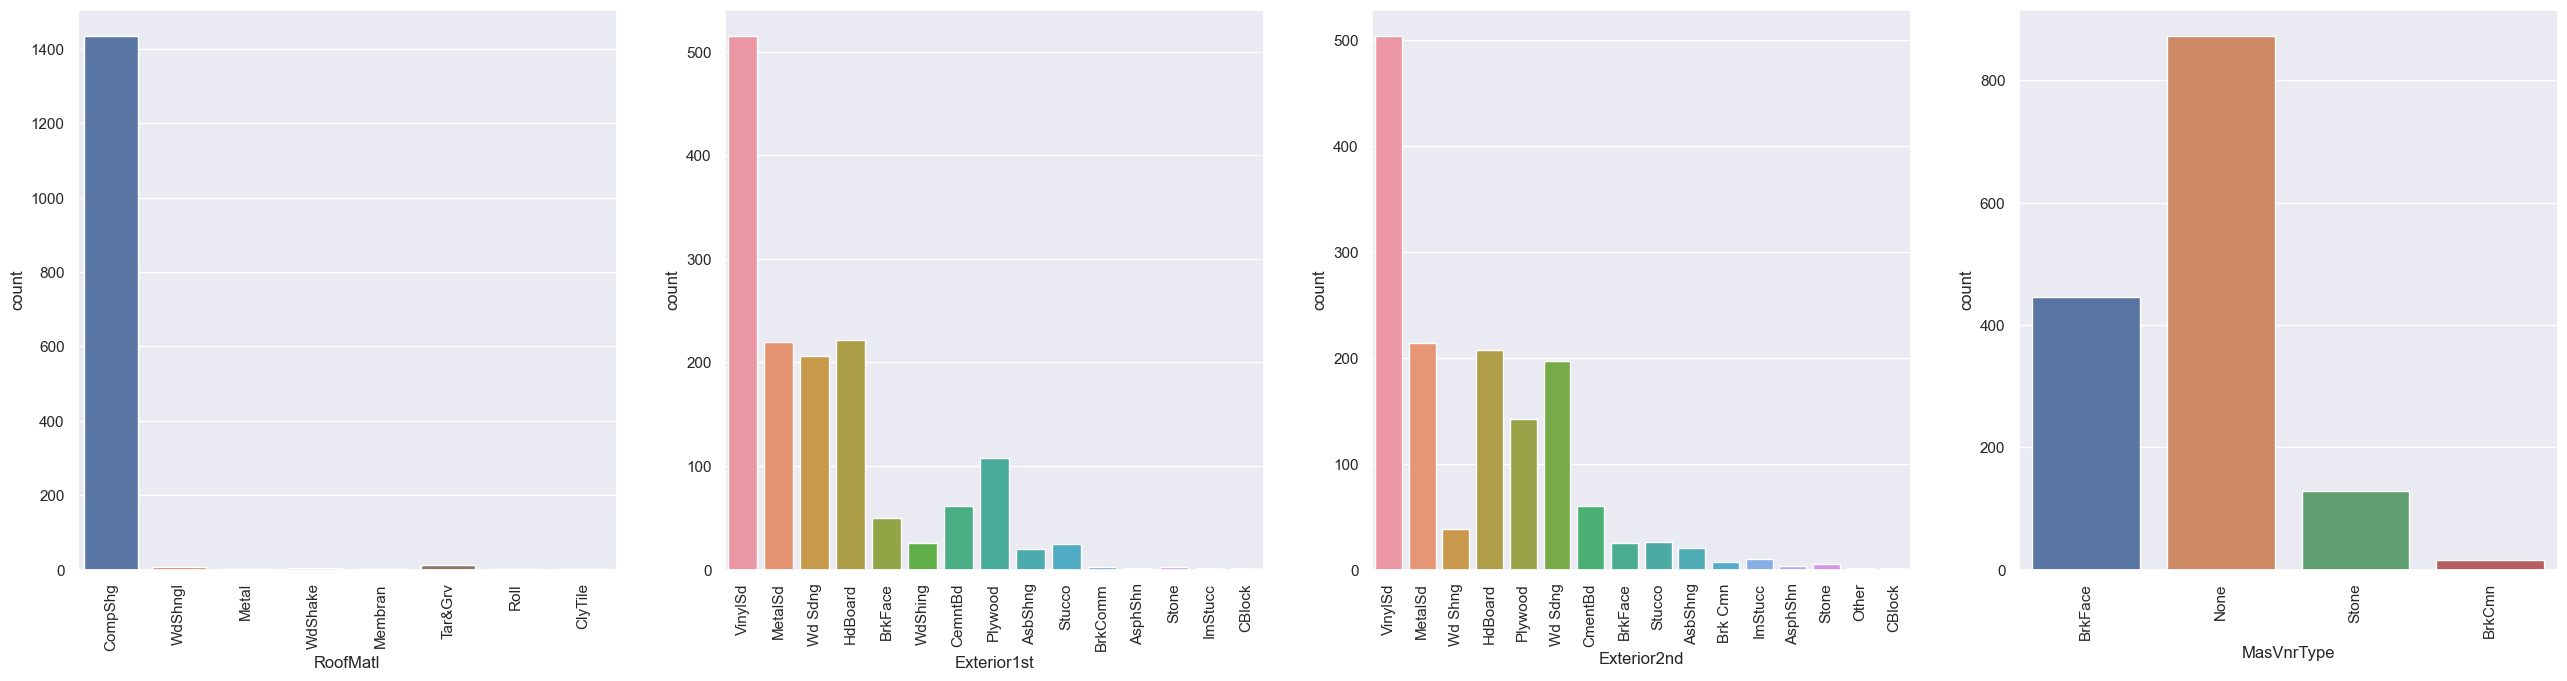

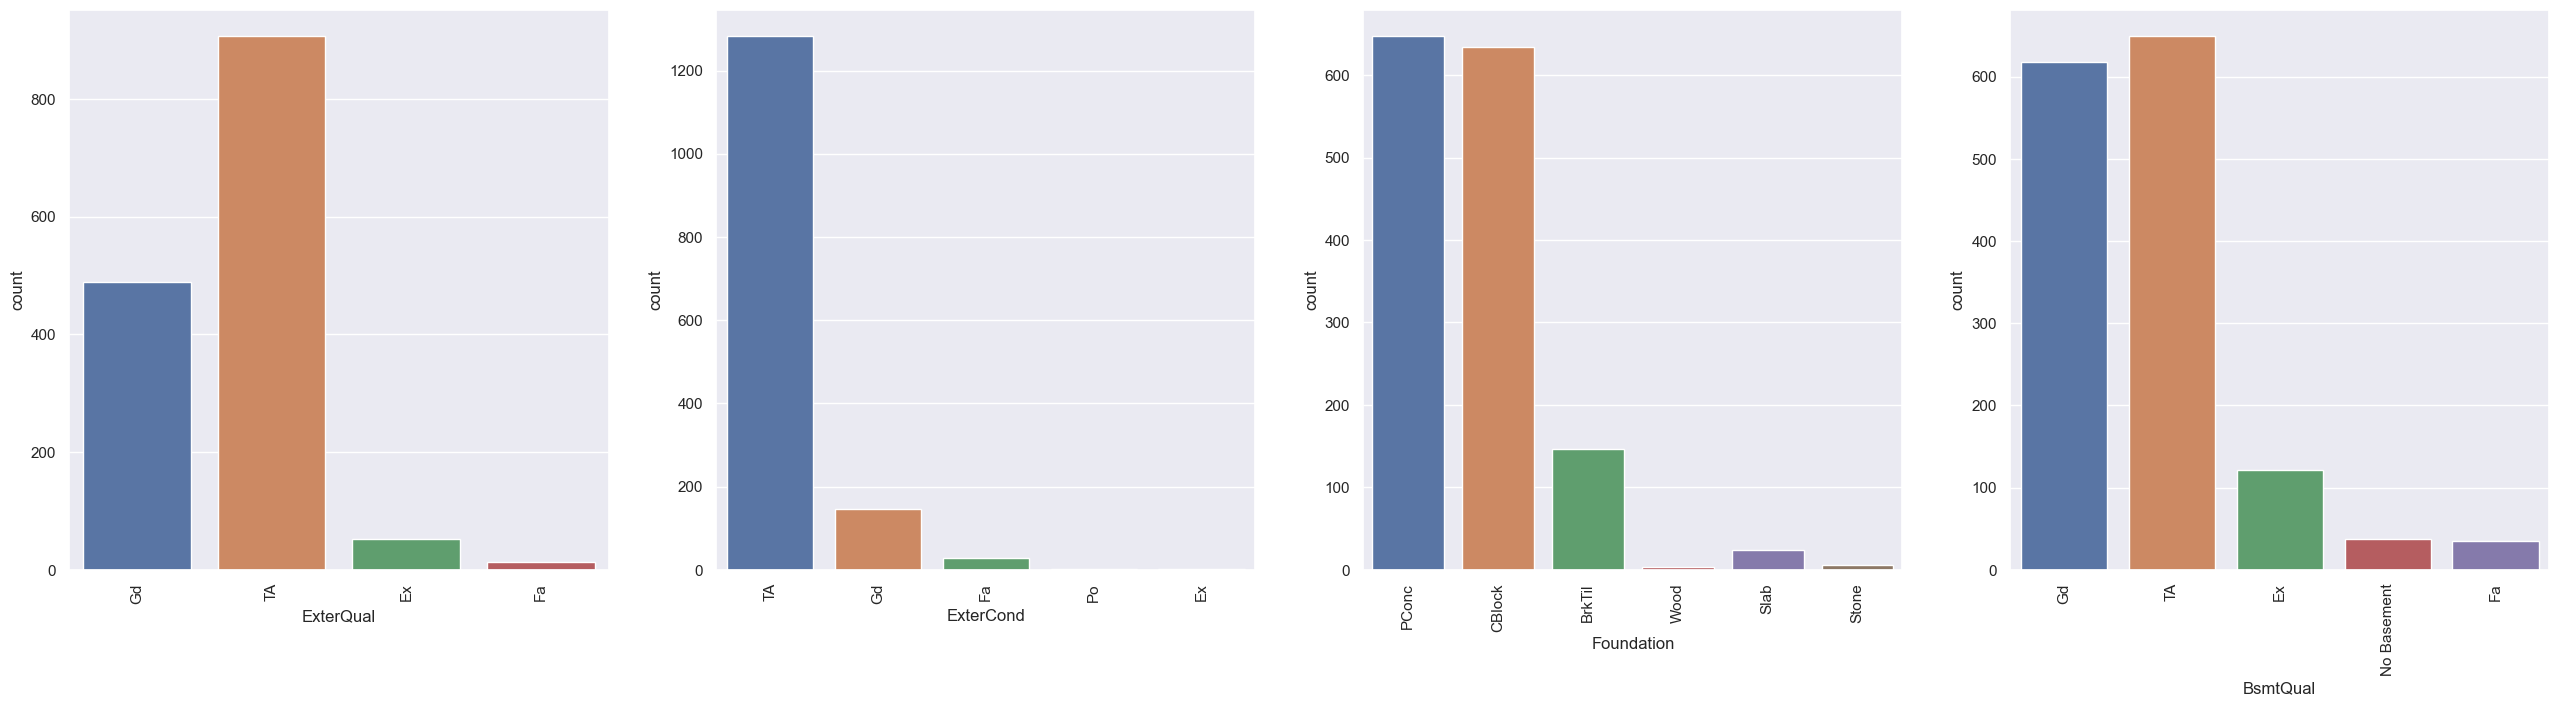

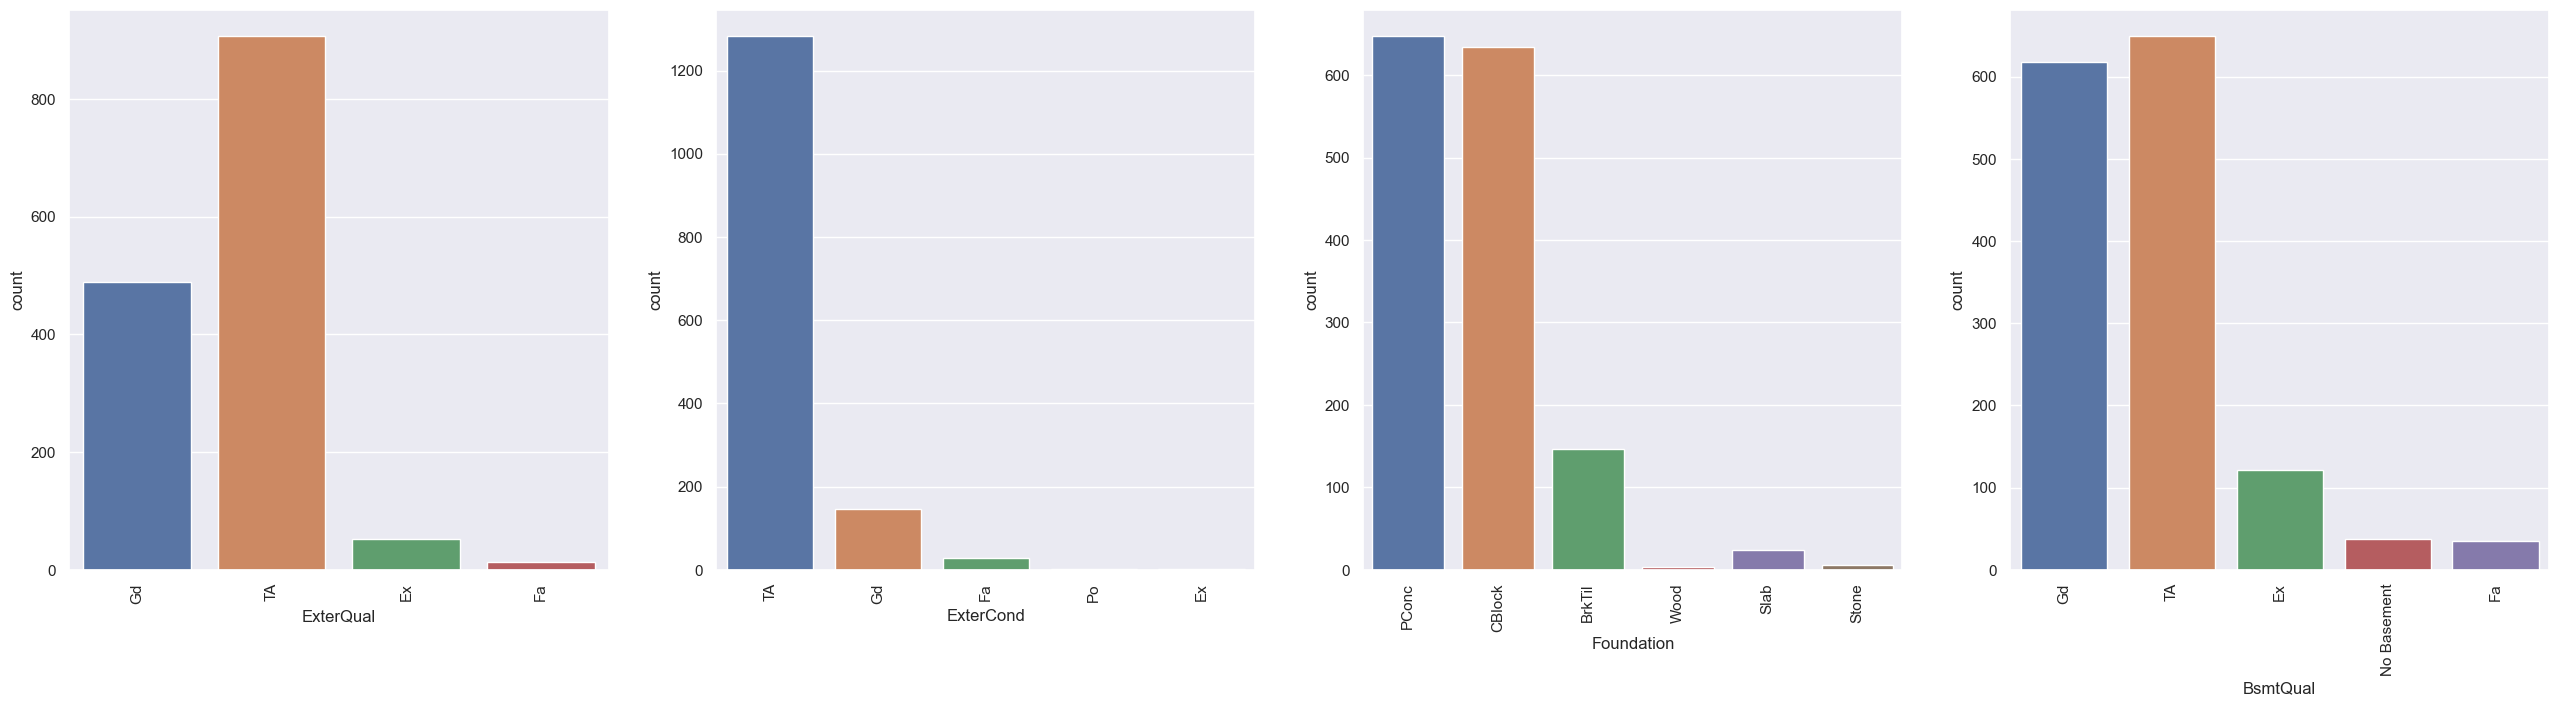

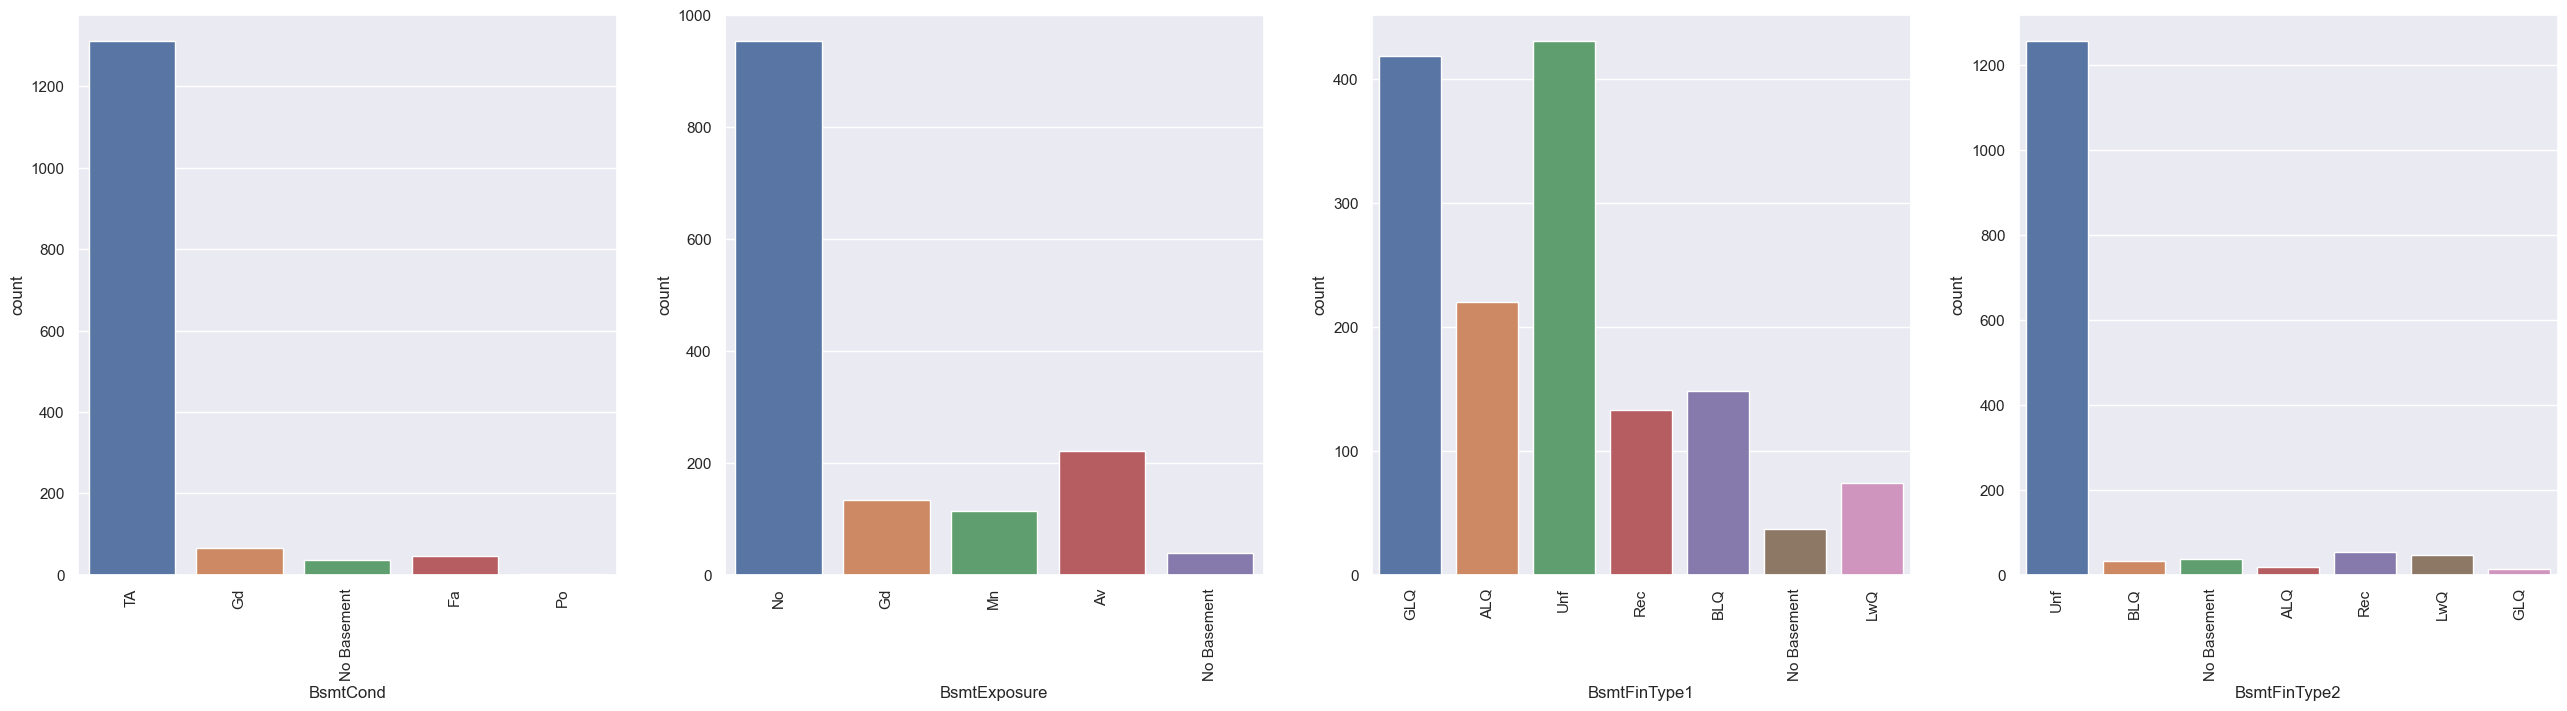

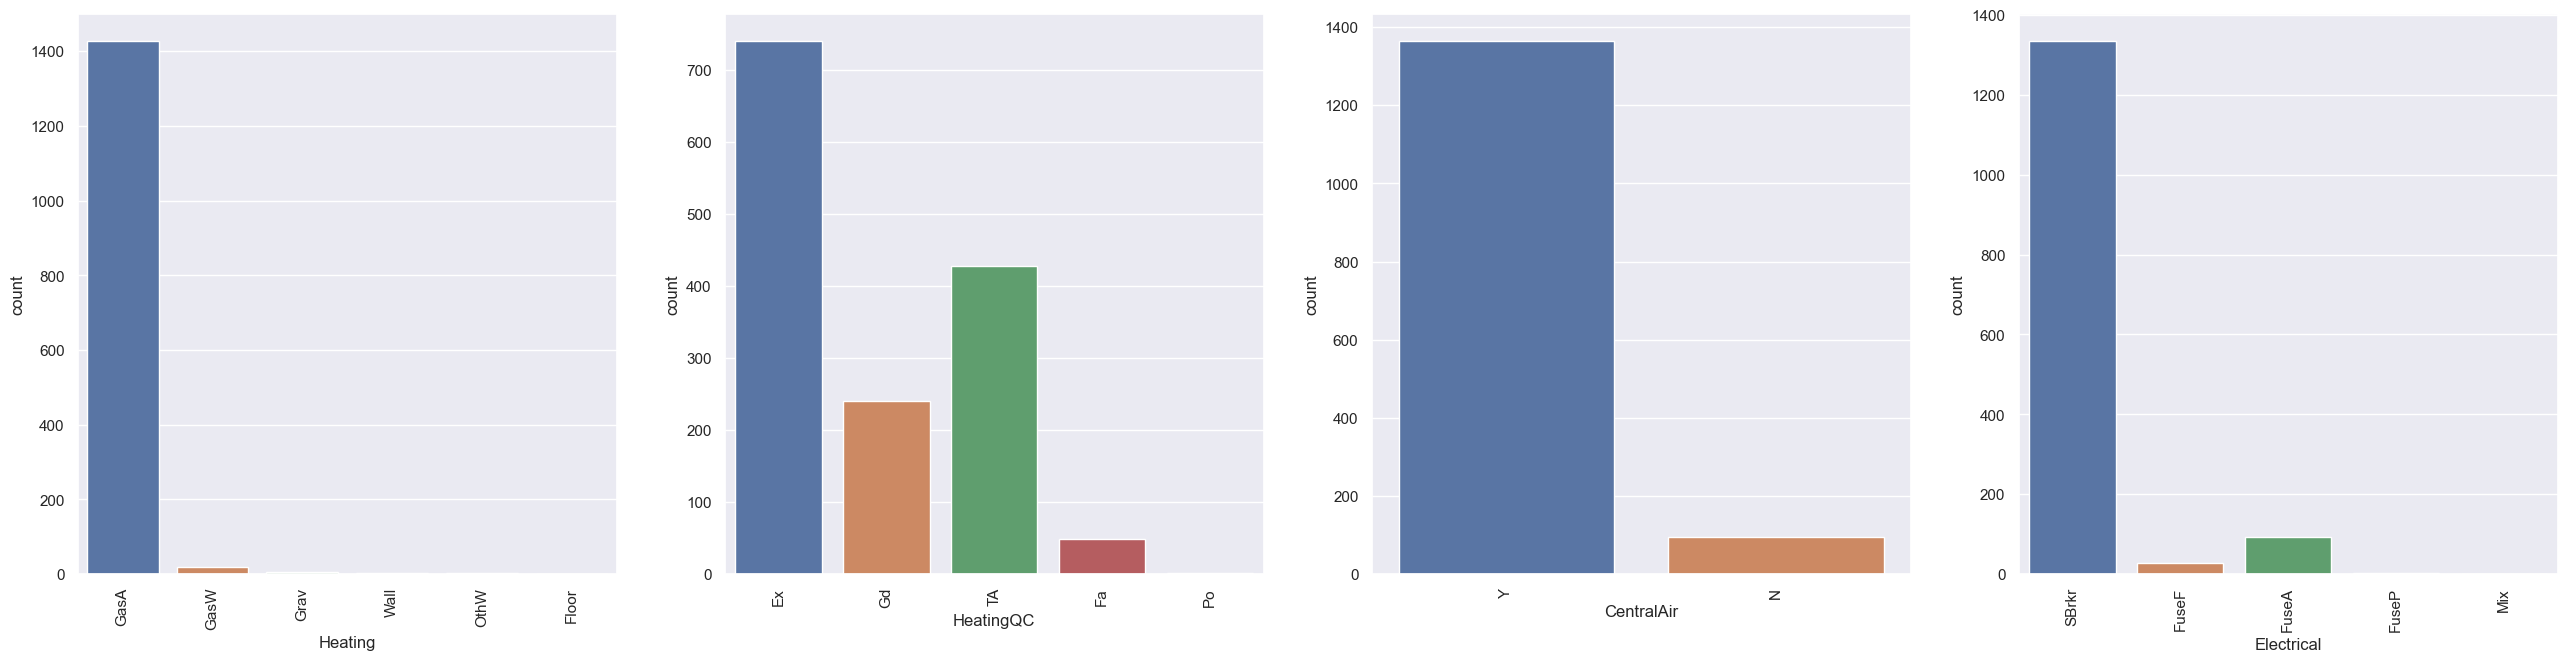

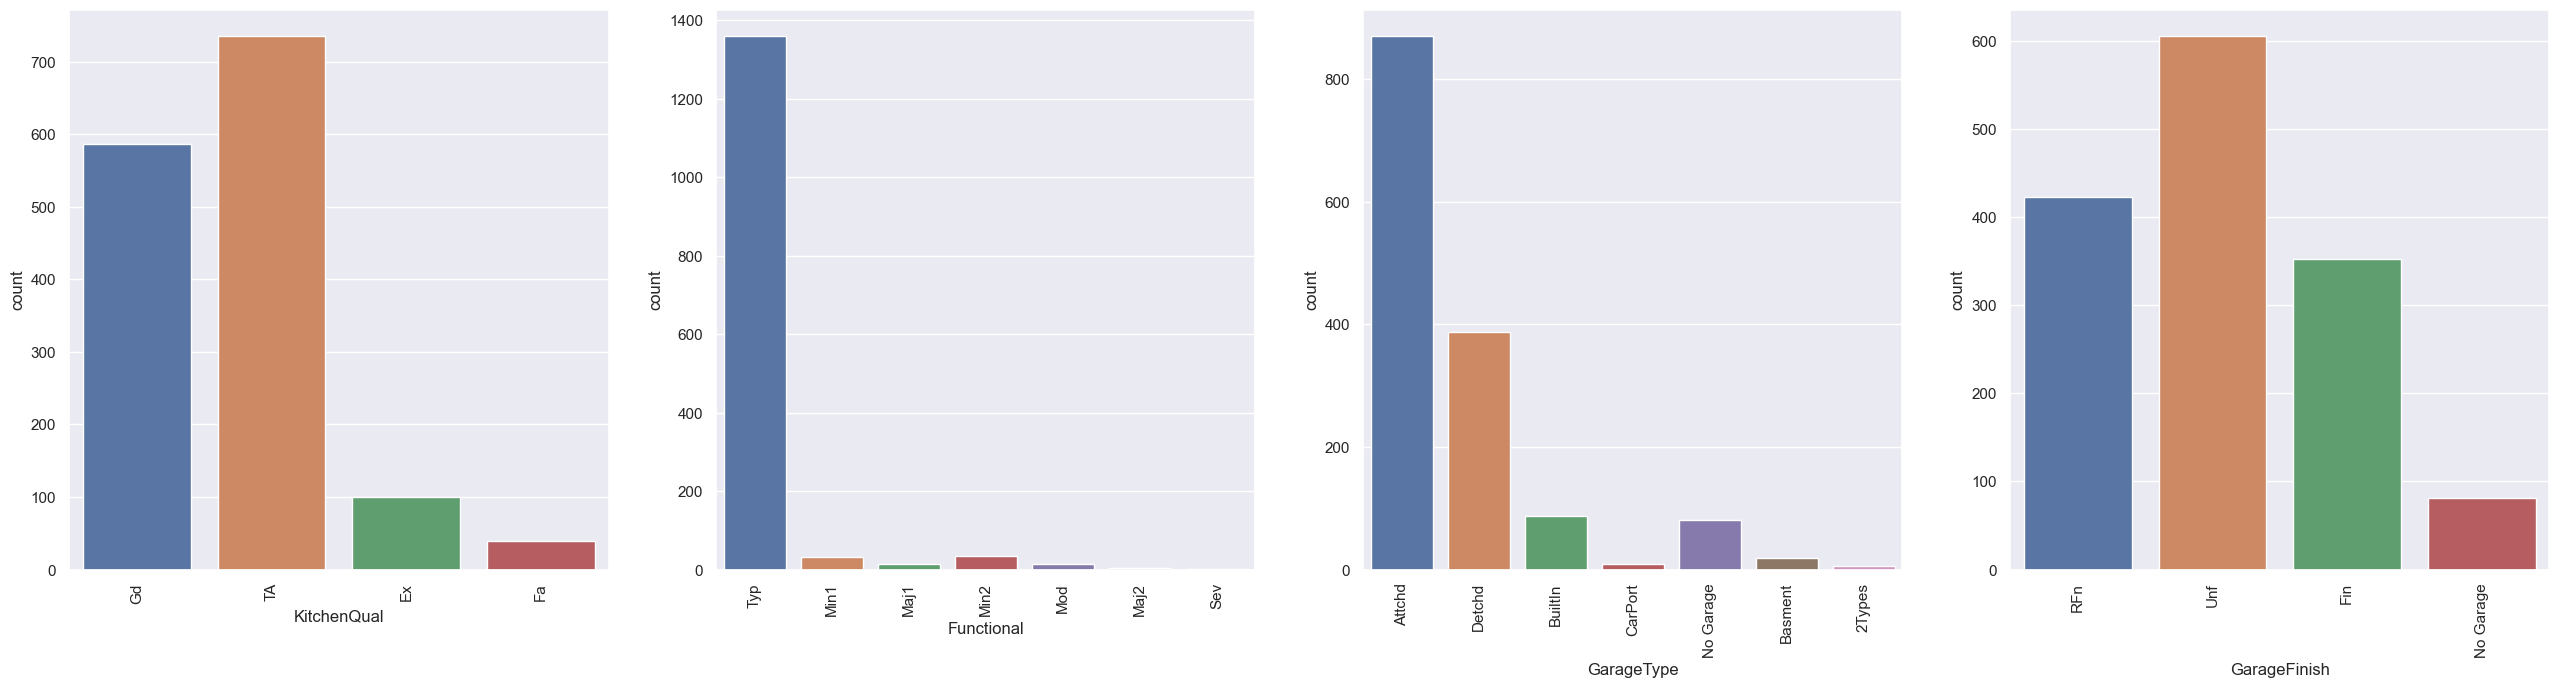

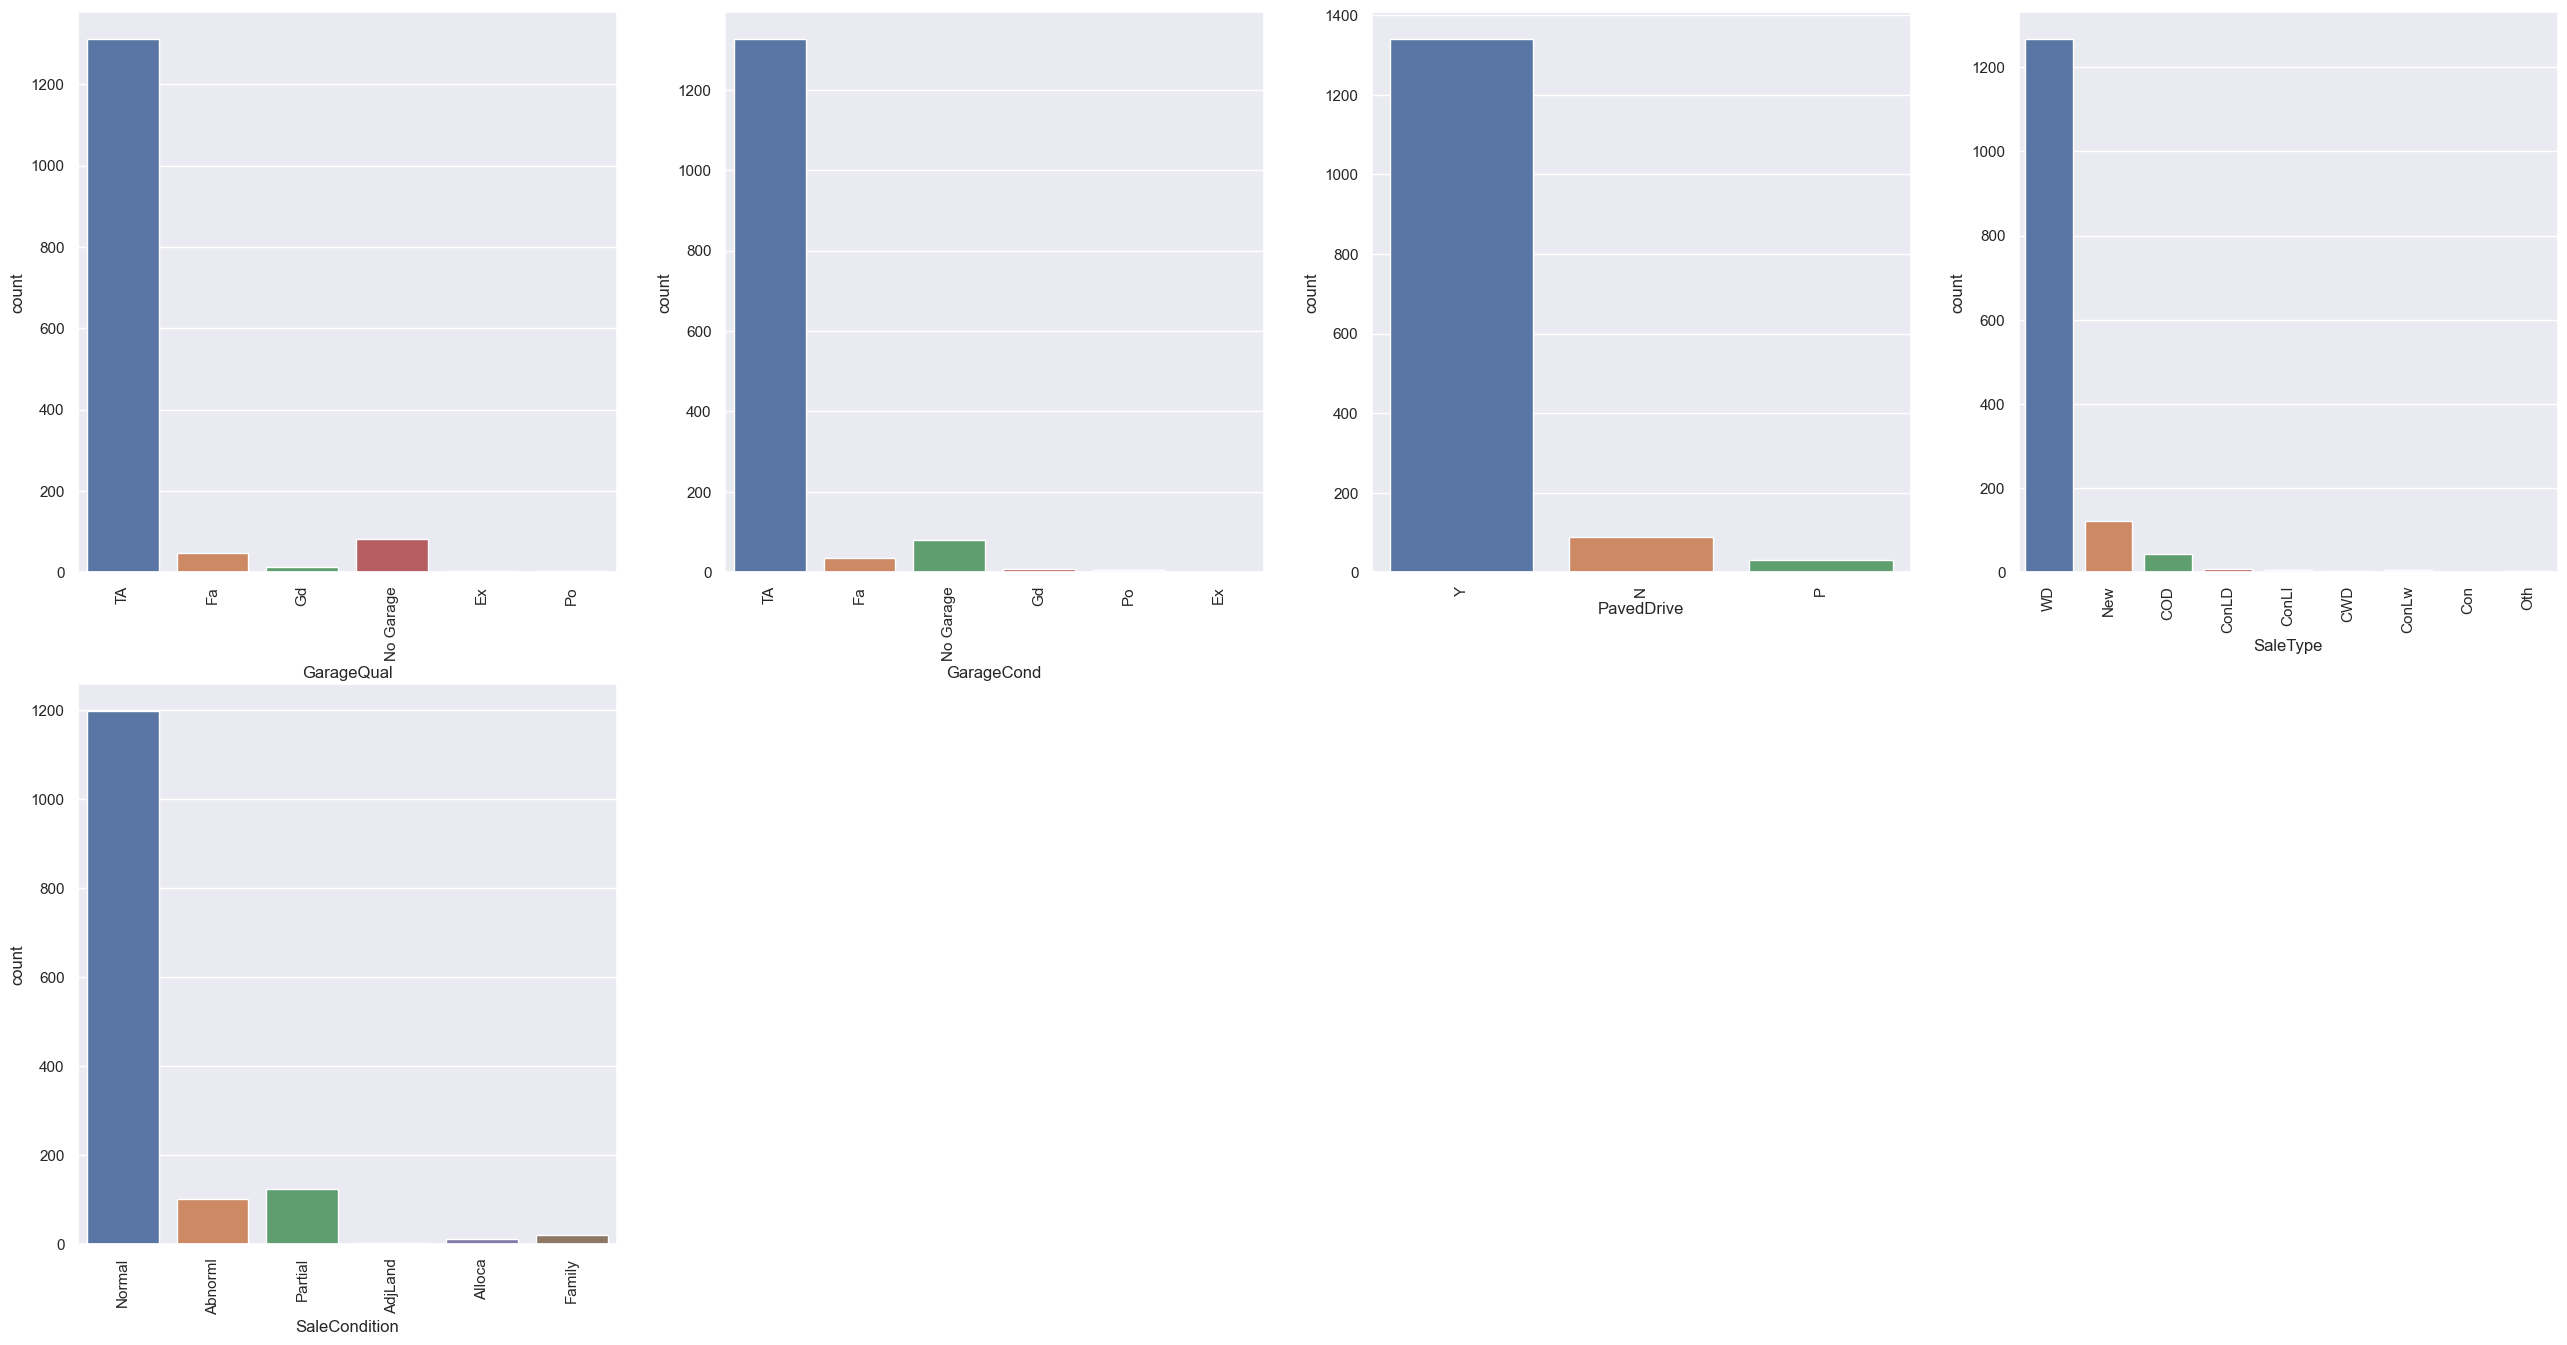

In [28]:
# COUNT PLOTS
countplot(categorical.columns[0:4])
countplot(categorical.columns[4:8])
countplot(categorical.columns[8:12])
countplot(categorical.columns[12:16])
countplot(categorical.columns[16:20])
countplot(categorical.columns[20:24])
countplot(categorical.columns[20:24])
countplot(categorical.columns[24:28])
countplot(categorical.columns[28:32])
countplot(categorical.columns[32:36])
countplot(categorical.columns[36:])


###OUTCOME INFERENCES
#HIGHLY SKEWED COLUMNS: 
#Functional, 
#GarageQual,
#GarageCond,SaleType, 
#CentralAir,
#Heating,
#ExterCond, 
#RoofMatl, 
#LandSlope,
#LandContour,
#Electrical, 
#BsmtFinType2,
#PavedDrive,
#BsmtCond, 
#Utilities,
#Street,
#Condition1,
#Condition2

>>>> HIGHLY SKKEWED COLUMNS TO BE DROPPED

#LESS SKEWED COLUMNS: 
#Foundation, 
#GarageType, 
#SaleCondition, 
#HouseStyle, 
#RoofStyle, 
#Exterior1st, 
#Exterior2nd, 
#MSZoning

>>>> HIGHLY SKKEWED COLUMNS TO BE ADJUSTED BY COMBINING

  
    

#DROPPING HIHGLY SKEWED COLUMNS

In [30]:
# DATA SKEW ANALYSIS
skewedCols = ['Functional', 'GarageQual', 'GarageCond', 'SaleType', 'CentralAir', 'Heating', 'ExterCond', 'RoofMatl', 'LandSlope', 'LandContour', 'Electrical', 'BsmtFinType2', 'PavedDrive', 'BsmtCond', 'Utilities', 'Street', 'Condition1', 'Condition2']
data.drop(skewedCols, axis=1,inplace=True)

In [31]:
# ADJUST SKEWNESS BY COMBINE

data['Foundation'] = data['Foundation'].replace(['Slab','Stone','Wood'],'Others')
data['GarageType'] = data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
data['SaleCondition'] = data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
data['HouseStyle'] = data['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
data['RoofStyle'] = data['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
data['Exterior1st'] = data['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
data['Exterior2nd'] = data['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
data['MSZoning'] = data['MSZoning'].replace(['RH','C (all)'],'Others')

In [32]:
# CREATION OF NEW VARIABLES FROM TWO VARIABLES
data['YearSinceRemodel'] = 2010 - ((data['YearRemodAdd'] - data['YearBuilt']) + data['YearBuilt']) 

## DATA VISUALIZATION

In [33]:
data.shape

(1460, 58)

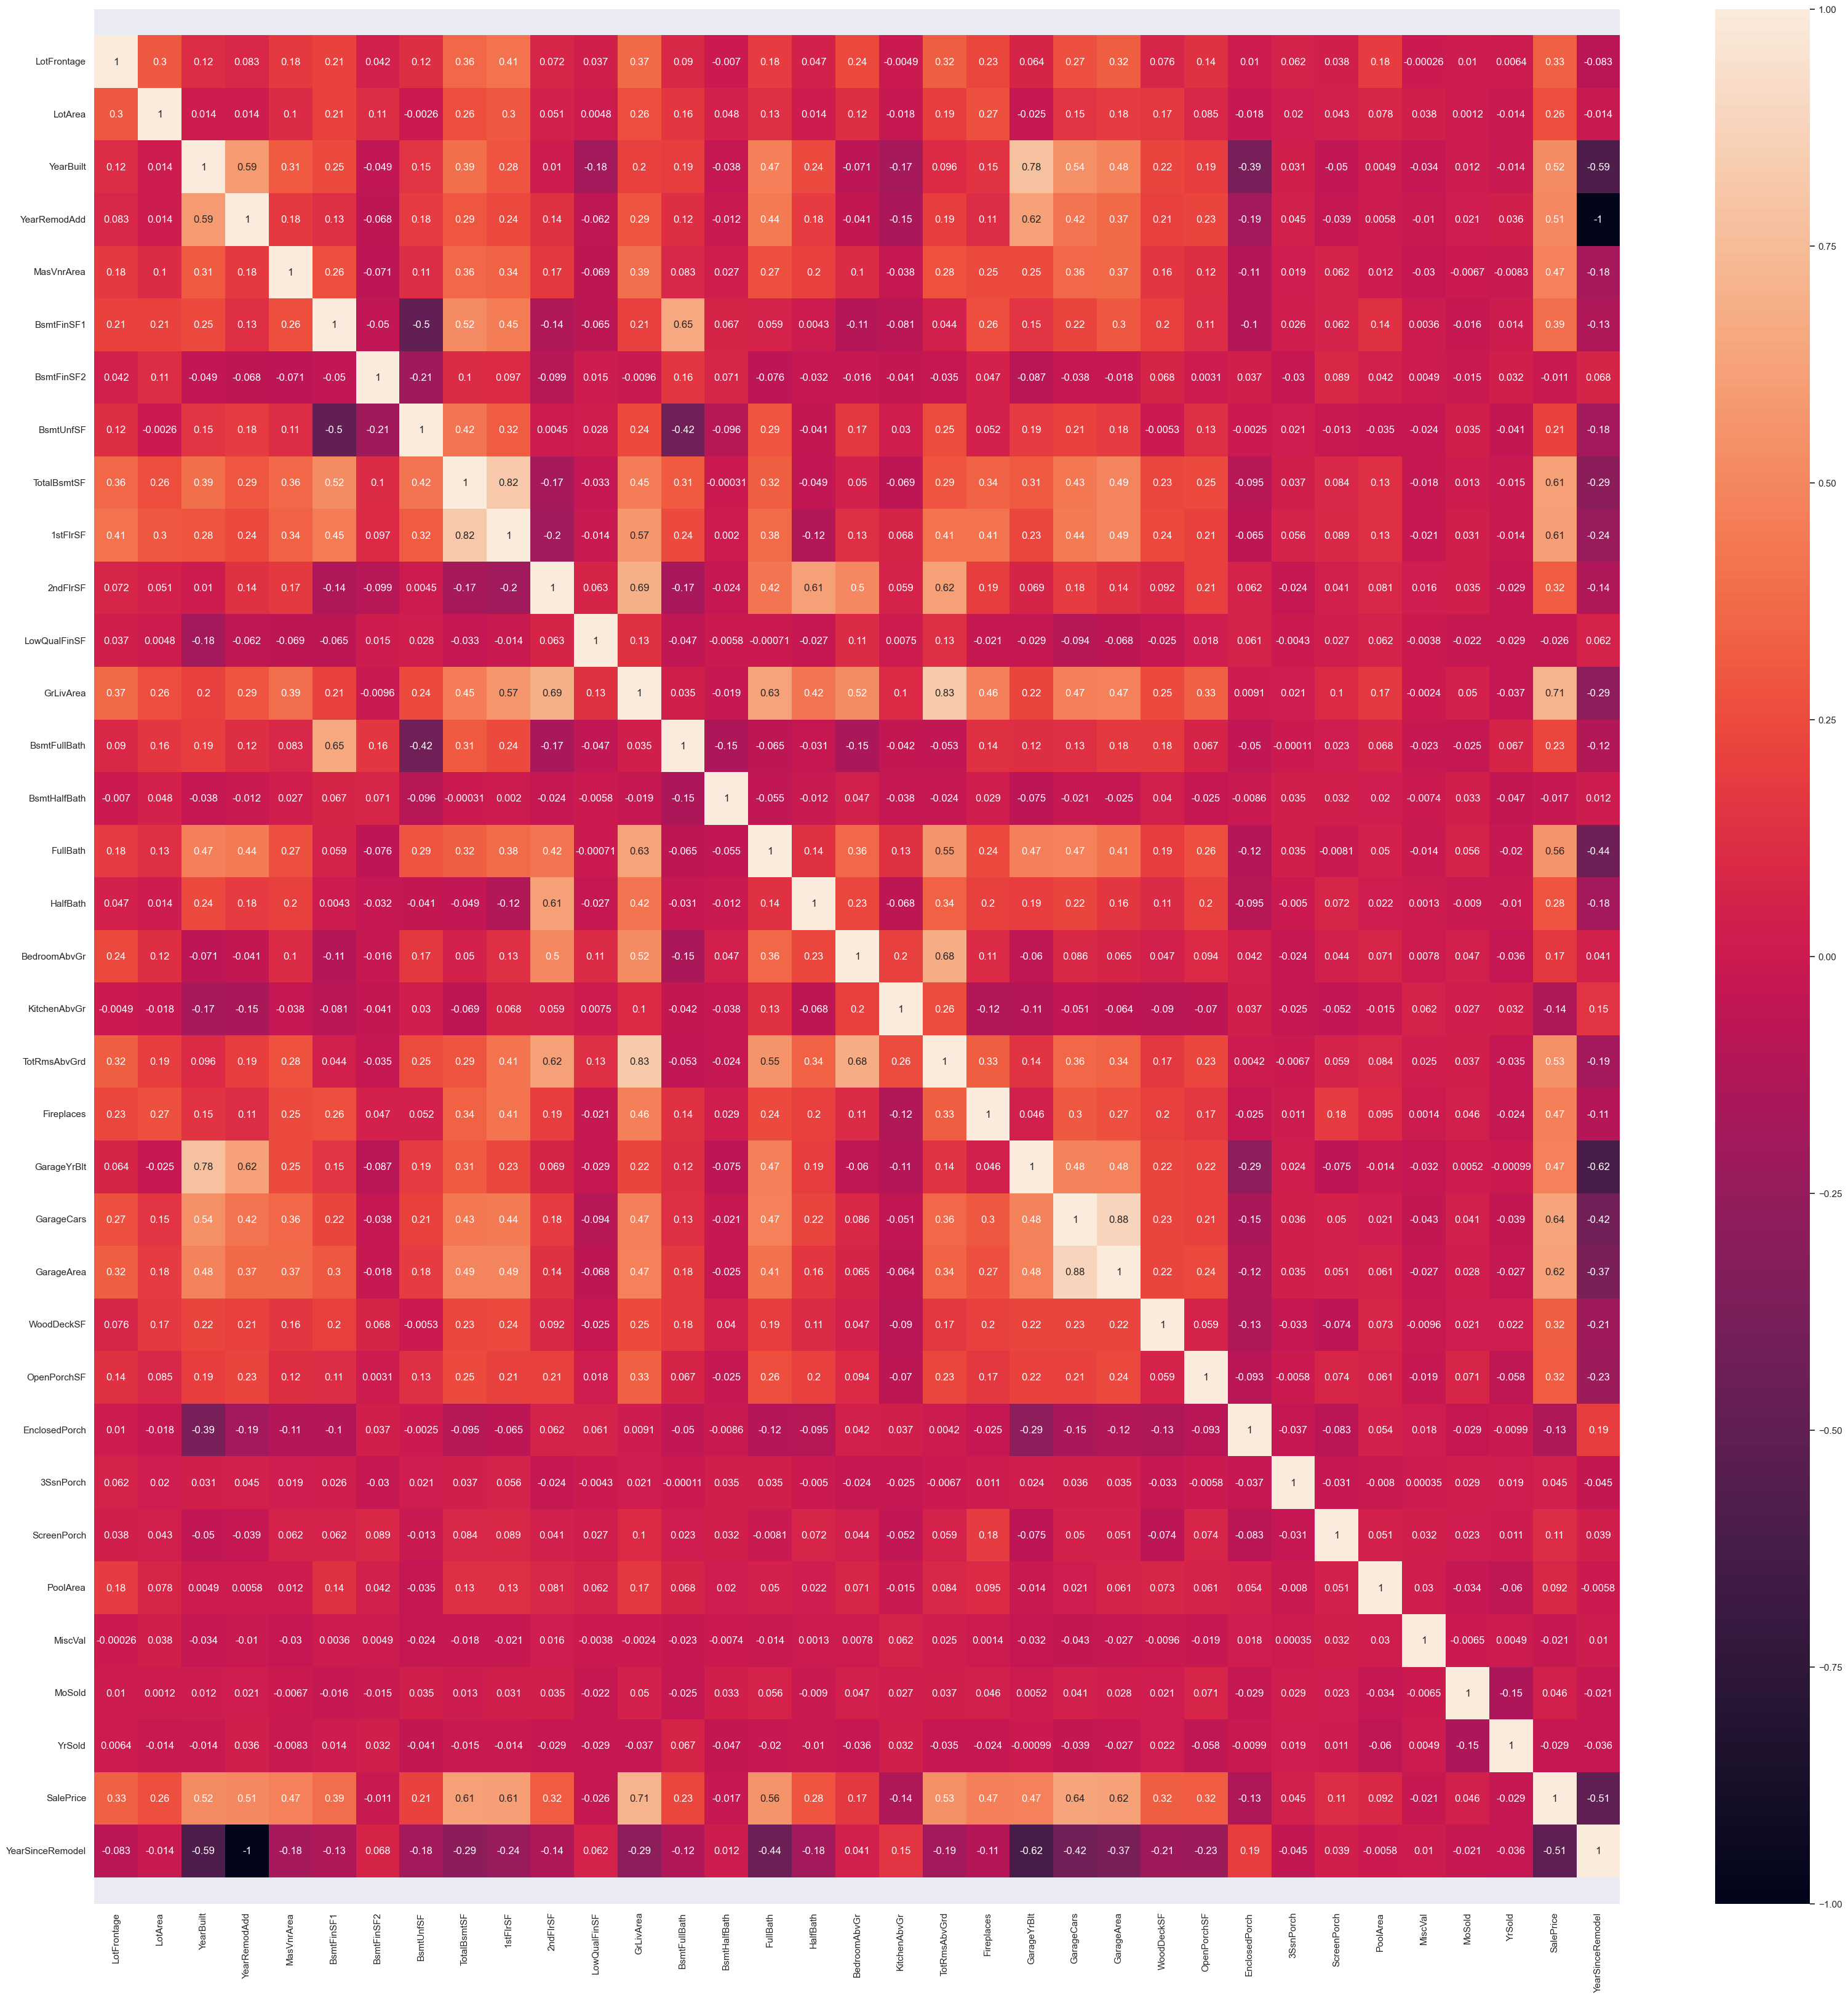

In [34]:
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [36]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()
corr_coef = corr_val[abs(corr_val['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
YearSinceRemodel   -0.507101
Name: SalePrice, dtype: float64


# PAIR PLOT FOR COORELATION FEATURES

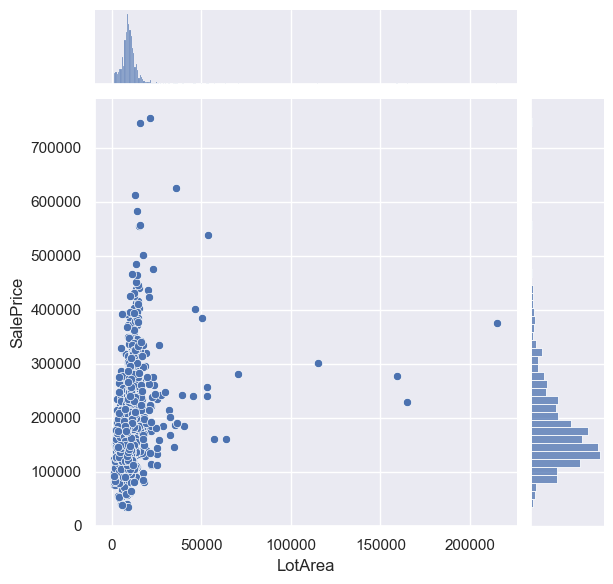

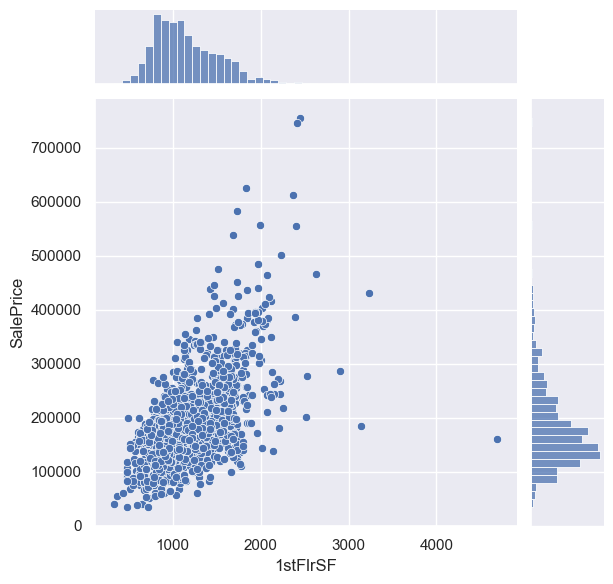

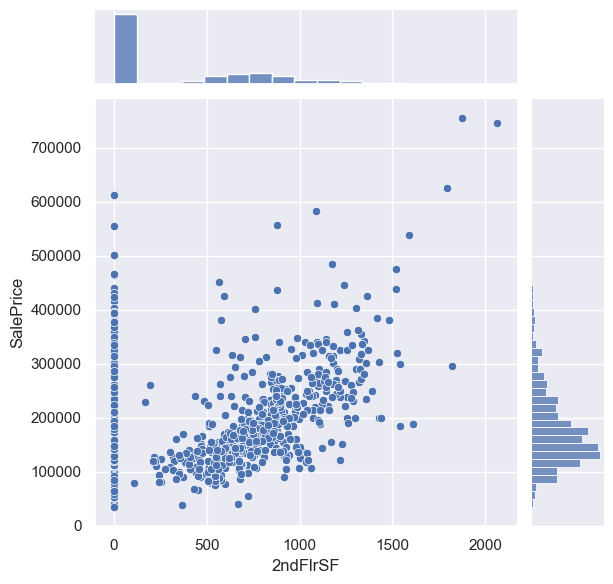

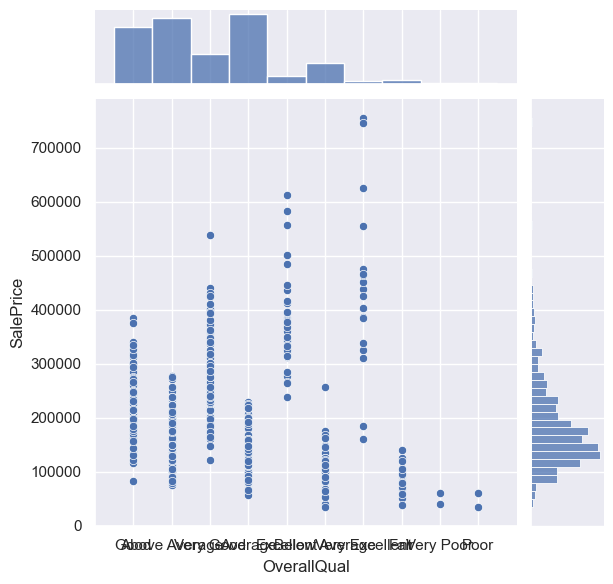

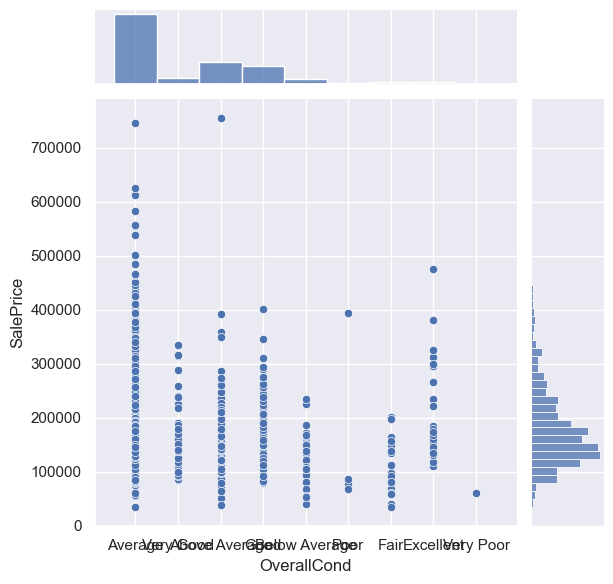

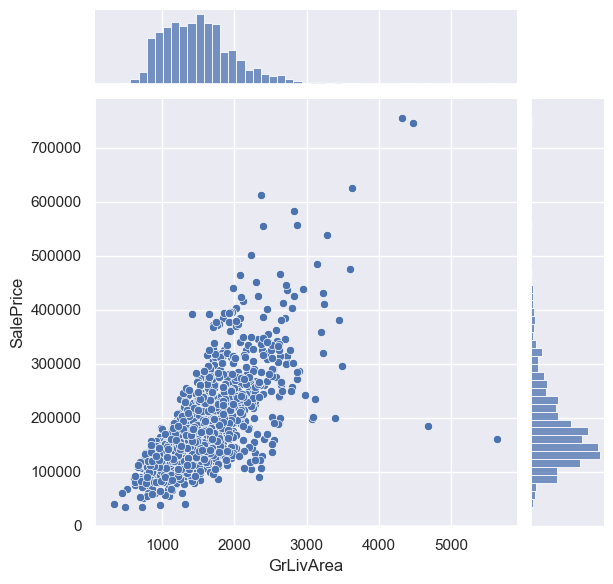

In [37]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()


# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()


# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()


# GrLivArea VS SalePrice
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

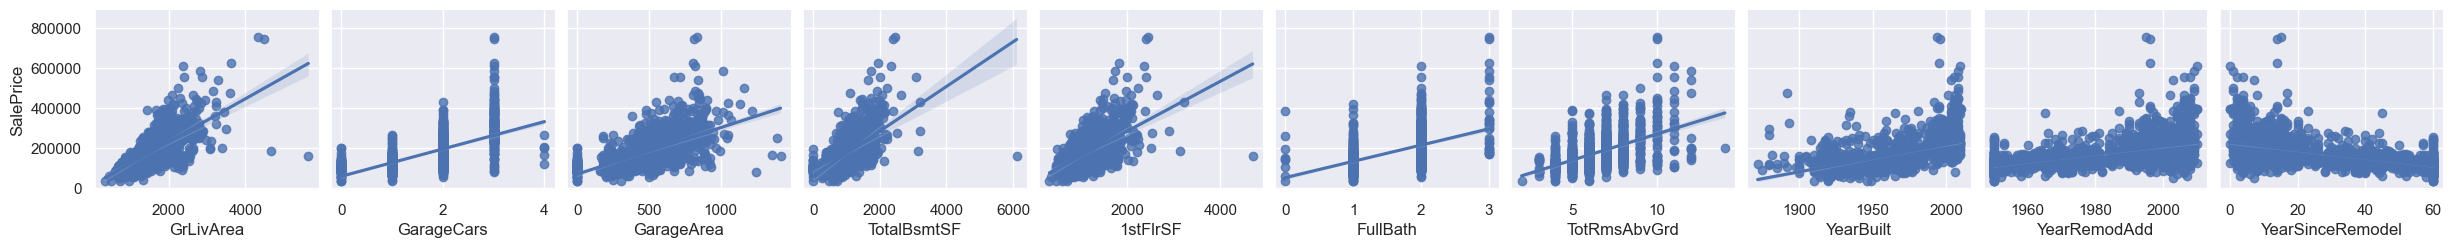

In [38]:
sns.pairplot(data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

# DISTRIBUTION OF DEPENDENT VARIABLES

In [39]:
data.shape


(1460, 58)

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

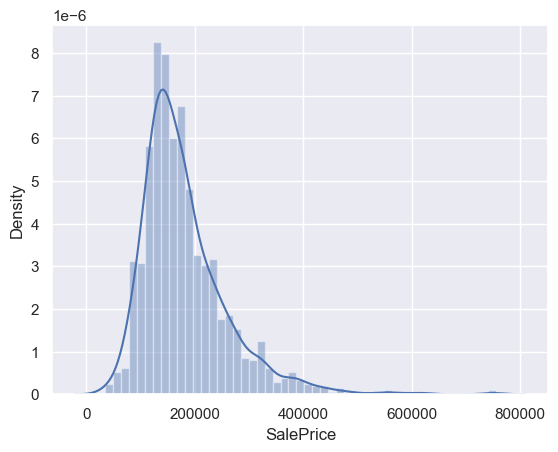

In [40]:
data['SalePrice'].describe()
sns.distplot(data['SalePrice'])

In [41]:
print("Skew Value: %f" % data['SalePrice'].skew())

Skew Value: 1.882876


Skew Value: 0.121335


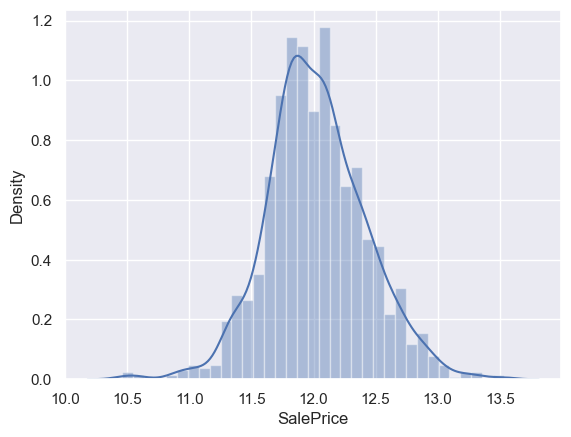

In [42]:
data['SalePrice']=np.log(data.SalePrice)
sns.distplot(data['SalePrice'])
print("Skew Value: %f" % data['SalePrice'].skew())

# STATUS OF DUMMY VARIABLES

In [44]:
categorical = data.select_dtypes(include=['object']) 
categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [45]:
# continious variables
continuous = data.select_dtypes(include=['int64','float64'])
continuous_vars = continuous.columns

In [47]:
data = pd.get_dummies(data = data, columns = categorical.columns,drop_first=True)
data.shape

(1460, 165)

In [48]:
data.shape
data.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  YearSinceRemodel  \
0         0        0       2    2008   2.505338                 7   
1         0        0       5    2007   2.493950                34   
2         0        0       9    2008   2.510994                 8   
3         0        0       2    2006   2.472277                40   
4         0        0      12    2008   2.520050                10   

   MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0  

# TEST TRAIN SPLIT OF DATA

In [49]:
# split the data into train and test sets
data_train, data_test = train_test_split(data, train_size= 0.7, random_state=100)
print("Shape of train set: ", data_train.shape)
print("Shape of test set: ", data_test.shape)

Shape of train set:  (1021, 165)
Shape of test set:  (439, 165)


In [50]:
data_test.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1436         60.0     9000       1971          1971         0.0         616   
57           89.0    11645       2004          2004         0.0           0   
780          63.0     7875       1995          1996        38.0           0   
382          79.0     9245       2006          2006         0.0           0   
1170         76.0     9880       1977          1977         0.0         522   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1436           0        248          864       864         0             0   
57             0        860          860       860       860             0   
780            0       1237         1237      1253         0             0   
382            0        939          939       939       858             0   
1170           0        574         1096      1118         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1436        864             0             0         1         0             3   
57         1720             0             0         2         1             3   
780        1253             0             0         2         0             3   
382        1797             0             0         2         1             3   
1170       1118             1             0         1         0             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1436             1             5           0       1974.0           2   
57               1             7           0       2004.0           2   
780              1             6           1       1995.0           2   
382              1             8           0       2006.0           2   
1170             1             6           1       1977.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1436         528           0            0              0          0   
57           565           0           70              0          0   
780          402         220           21              0          0   
382          639         144           53              0          0   
1170         358         203            0              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
1436            0         0        0       5    2007   2.459538   
57              0         0        0       8    2006   2.500486   
780             0         0        0       6    2007   2.491405   
382             0         0        0       4    2007   2.507271   
1170            0       576        0       7    2008   2.489016   

      YearSinceRemodel  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1436                39                                         0   
57                   6                                         0   
780                 14                                         0   
382                  4                                         0   
1170                33                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
1436                                0   
57                                  0   
780                                 0   
382                                 0   
1170                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1436                                           1   
57                                             0   
780                                            1   
382                                            0   
1170                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1436                                                  0                  
57                                                    0                  
780                                                   0                  
382                                      

In [51]:
data_train.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
318          90.0     9900       1993          1993       256.0         987   
239          52.0     8741       1945          1950         0.0          94   
986          59.0     5310       1910          2003         0.0           0   
1416         60.0    11340       1885          1950         0.0           0   
390          50.0     8405       1900          1950         0.0         241   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
318            0        360         1347      1372      1274             0   
239            0        641          735       798       689             0   
986            0        485          485      1001       634             0   
1416           0        777          777      1246      1044             0   
390          391        229          861       961       406             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
318        2646             1             0         2         1             4   
239        1487             0             0         1         1             3   
986        1635             0             0         1         0             2   
1416       2290             0             0         2         0             4   
390        1367             1             0         1         0             4   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
318              1             9           1       1993.0           3   
239              1             7           1       1949.0           1   
986              1             5           0       1950.0           1   
1416             2            11           0       1971.0           2   
390              1             7           0       1978.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
318          656         340           60            144          0   
239          220           0          140              0          0   
986          255         394            0              0          0   
1416         560           0            0            114          0   
390          384           0          130            112          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
318             0         0        0       4    2009   2.523200   
239             0         0        0       4    2010   2.454030   
986             0         0        0       6    2006   2.457015   
1416            0         0        0       4    2010   2.460944   
390             0         0        0       4    2008   2.458467   

      YearSinceRemodel  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
318                 17                                         0   
239                 60                                         1   
986                  7                                         1   
1416                60                                         0   
390                 60                                         1   

      MSSubClass_1-STORY 1945 & OLDER  \
318                                 0   
239                                 0   
986                                 0   
1416                                0   
390                                 0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
318                                            0   
239                                            0   
986                                            0   
1416                                           0   
390                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
318                                                   0                  
239                                                   0                  
986                                                   0                  
1416                                     

In [52]:
# SCALING CONTINIOUS VARIABLES IN TRAINING DATA SET
scaler = MinMaxScaler()
data_train[continuous_vars] = scaler.fit_transform(data_train[continuous_vars])
data_train.describe()

LotFrontage      LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean      0.166332     0.042162     0.719719      0.583072     0.065306   
std       0.075653     0.048221     0.219718      0.343416     0.117088   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.133562     0.027937     0.594203      0.283333     0.000000   
50%       0.164384     0.037555     0.731884      0.733333     0.000000   
75%       0.195205     0.046943     0.927536      0.900000     0.098750   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.079406     0.033980     0.241329     0.173813     0.184401   
std       0.082409     0.115907     0.192097     0.075139     0.092106   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.092466     0.129787     0.116667   
50%       0.069454     0.000000     0.197774     0.162684     0.165278   
75%       0.126152     0.000000     0.345034     0.215057     0.243056   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000   
mean      0.166364      0.011649     0.207562      0.146588      0.029873   
std       0.210895      0.093608     0.102200      0.175127      0.120615   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000      0.000000     0.133935      0.000000      0.000000   
50%       0.000000      0.000000     0.197540      0.000000      0.000000   
75%       0.352542      0.000000     0.256726      0.333333      0.000000   
max       1.000000      1.000000     1.000000      1.000000      1.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000   
mean      0.522364     0.188541      0.357003      0.026934      0.318582   
std       0.183957     0.250403      0.102499      0.115084      0.145956   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.333333     0.000000      0.250000      0.000000      0.181818   
50%       0.666667     0.000000      0.375000      0.000000      0.272727   
75%       0.666667     0.500000      0.375000      0.000000      0.363636   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.199478     0.716106     0.442948     0.332860     0.108100   
std       0.215256     0.217720     0.186530     0.149657     0.145250   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.572727     0.250000     0.232722     0.000000   
50%       0.333333     0.713692     0.500000     0.338505     0.000000   
75%       0.333333     0.918182     0.500000     0.406206     0.196033   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1021.000000    1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.089934       0.042105     0.007756     0.037559     0.003318   
std       0.126569       0.114434     0.063649     0.136582     0.053278   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%       0.049713       0.000000     0.000000     0.000000     0.000000   
75%       0.133843       0.000000     0.000000     0.000000     0.000000   
m

In [53]:
# X_train, y_train populations
y_train = data_train.pop("SalePrice")
X_train = data_train


In [54]:
print("Target shape: ", y_train.shape)
print("Dependent variables shape: ", X_train.shape)

Target shape:  (1021,)
Dependent variables shape:  (1021, 164)


In [55]:
# implying the scale
data_test[continuous_vars] = scaler.transform(data_test[continuous_vars])

In [56]:
#X_train, y_train
y_test = data_test.pop("SalePrice")
X_test = data_test
print("Target shape: ", y_test.shape)
print("Dependent variables shape: ", X_test.shape)

Target shape:  (439,)
Dependent variables shape:  (439, 164)


# BULDING THE  REGRESSION MODEL AND REGULARIZATION

In [57]:
# list of alphas to tune
ridge_params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = ridge_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006589      0.000352         0.003321        0.000161     0.00004   
1       0.005647      0.000186         0.002989        0.000180      0.0001   
2       0.005505      0.000136         0.003131        0.000009       0.001   
3       0.006376      0.000301         0.003231        0.000088        0.01   
4       0.006122      0.000792         0.003380        0.000278         0.1   
5       0.005945      0.000144         0.003154        0.000260          10   
6       0.005711      0.000173         0.003173        0.000158         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 4e-05}           0.865910           0.781521           0.832146   
1  {'alpha': 0.0001}           0.865912           0.781524           0.832148   
2   {'alpha': 0.001}           0.865939           0.781556           0.832176   
3    {'alpha': 0.01}           0.866202           0.781881           0.832459   
4     {'alpha': 0.1}           0.868449           0.784822           0.834788   
5      {'alpha': 10}           0.889174           0.829307           0.838694   
6     {'alpha': 100}           0.821913           0.762835           0.764235   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.886369           0.892308         0.851651        0.040891   
1           0.886371           0.892312         0.851653        0.040891   
2           0.886409           0.892372         0.851691        0.040897   
3           0.886751           0.892954         0.852049        0.040951   
4           0.888700           0.897137         0.854779        0.041050   
5           0.895691           0.886240         0.867821        0.027941   
6           0.813332           0.782341         0.788931        0.024566   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.924557            0.934826   
1                5            0.924557            0.934826   
2                4            0.924557            0.934826   
3                3            0.924556            0.934825   
4                2            0.924463            0.934743   
5                1            0.901821            0.913014   
6                7            0.805332            0.816517   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.931428            0.920217            0.918457   
1            0.931428            0.920217            0.918457   
2            0.931428            0.920217            0.918457   
3            0.931426            0.920216            0.918454   
4            0.931288            0.920139            0.918263   
5            0.909130            0.899084            0.896654   
6            0.817402            0.807301            0.804007   

   mean_train_score  std_train_score  
0          0.925897         0.006320  
1          0.925897         0.006320  
2          0.925897         0.006320  
3          0.925895         0.006321  
4          0.925779         0.006336  
5          0.903941         0.006171  
6          0.810112         0.005695

In [59]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

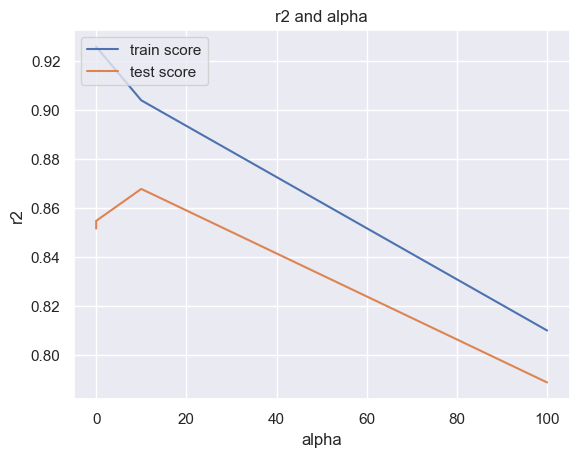

In [60]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
# the optimum alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.10692290e-03,  2.01473948e-02,  1.99877167e-02,  1.64481315e-02,
        1.22338183e-02,  1.52760511e-02,  1.10253488e-02,  2.51343460e-02,
        2.63802338e-02,  4.78196574e-02,  4.20937818e-02, -7.77347853e-04,
        5.63228757e-02,  3.20627948e-02,  3.63681027e-03,  5.09755342e-02,
        2.60407197e-02,  2.55691276e-02, -1.46640744e-02,  5.21025891e-02,
        4.45956376e-02,  3.58964684e-03,  4.19686028e-02,  3.30331219e-02,
        2.58945861e-02,  4.55731622e-03,  1.09298907e-02,  8.88733944e-03,
        1.65301799e-02, -8.99062851e-03, -3.79747674e-03,  9.66248163e-04,
       -9.52495639e-03, -1.64481315e-02,  9.63585340e-03, -3.16725517e-02,
        1.61938335e-02,  1.23513850e-03, -2.53603118e-04, -1.75975660e-03,
        1.44310209e-02,  1.76856152e-02,  9.42289227e-04, -1.66810192e-02,
        3.33057901e-03, -1.28501722e-02,  3.00514621e-03,  4.66492883e-04,
       -2.63633780e-02,  5.91267920e-03, -8.67070709e-03,  8.79560605e-03,
       -9.90356712e-03,  

In [62]:
print(ridge.score(X_train,y_train))


0.9032332909554525


In [63]:
print(ridge.score(X_test,y_test))

0.8715765655085447


In [64]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.417),
 ('LotFrontage', -0.046),
 ('LotArea', -0.033),
 ('YearBuilt', -0.032),
 ('YearRemodAdd', -0.032),
 ('MasVnrArea', -0.027),
 ('BsmtFinSF1', -0.027),
 ('BsmtFinSF2', -0.026),
 ('BsmtUnfSF', -0.026),
 ('TotalBsmtSF', -0.024),
 ('1stFlrSF', -0.024),
 ('2ndFlrSF', -0.023),
 ('LowQualFinSF', -0.02),
 ('GrLivArea', -0.02),
 ('BsmtFullBath', -0.02),
 ('BsmtHalfBath', -0.02),
 ('FullBath', -0.02),
 ('HalfBath', -0.019),
 ('BedroomAbvGr', -0.019),
 ('KitchenAbvGr', -0.018),
 ('TotRmsAbvGrd', -0.018),
 ('Fireplaces', -0.018),
 ('GarageYrBlt', -0.018),
 ('GarageCars', -0.018),
 ('GarageArea', -0.017),
 ('WoodDeckSF', -0.016),
 ('OpenPorchSF', -0.016),
 ('EnclosedPorch', -0.016),
 ('3SsnPorch', -0.016),
 ('ScreenPorch', -0.016),
 ('PoolArea', -0.015),
 ('MiscVal', -0.015),
 ('MoSold', -0.014),
 ('YrSold', -0.013),
 ('SalePrice', -0.013),
 ('YearSinceRemodel', -0.013),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSub

In [65]:
# LASSO REGRESSION
lasso_params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.027774      0.004899         0.003095        0.000224     0.00006   
1       0.009516      0.000275         0.003111        0.000207      0.0006   
2       0.009052      0.000449         0.002955        0.000198      0.0008   
3       0.008275      0.001023         0.002881        0.000470       0.001   
4       0.006533      0.000273         0.003066        0.000039       0.002   
5       0.006419      0.000207         0.003043        0.000085       0.004   
6       0.006486      0.000183         0.003012        0.000162       0.006   
7       0.006526      0.000120         0.002949        0.000191       0.008   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 6e-05}           0.879494           0.785765           0.838028   
1  {'alpha': 0.0006}           0.874416           0.805210           0.818574   
2  {'alpha': 0.0008}           0.865300           0.806932           0.807255   
3   {'alpha': 0.001}           0.855758           0.803431           0.800304   
4   {'alpha': 0.002}           0.821652           0.771905           0.759653   
5   {'alpha': 0.004}           0.746578           0.691802           0.676751   
6   {'alpha': 0.006}           0.661115           0.614251           0.614183   
7   {'alpha': 0.008}           0.577823           0.533924           0.540870   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.898241           0.902820         0.860870        0.043968   
1           0.878327           0.872758         0.849857        0.031337   
2           0.864321           0.853584         0.839478        0.026760   
3           0.847806           0.833501         0.828160        0.022643   
4           0.788334           0.759583         0.780225        0.023240   
5           0.721533           0.663088         0.699950        0.030343   
6           0.646200           0.586002         0.624350        0.026476   
7           0.569741           0.505898         0.545651        0.025908   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.920723            0.931456   
1                2            0.880823            0.894925   
2                3            0.868058            0.881790   
3                4            0.854891            0.868638   
4                5            0.798235            0.805629   
5                6            0.707013            0.714645   
6                7            0.624399            0.634211   
7                8            0.548850            0.555340   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.927152            0.916461            0.913886   
1            0.889365            0.878125            0.871216   
2            0.876484            0.865068            0.857012   
3            0.865364            0.851432            0.843277   
4            0.809152            0.799903            0.788579   
5            0.717669            0.719125            0.706276   
6            0.641466            0.634952            0.631376   
7            0.561031            0.559555            0.553440   

   mean_train_score  std_train_score  
0          0.921936         0.006544  
1          0.882891         0.008367  
2          0.869683         0.008687  
3          0.856720         0.009260  
4          0.800300         0.007051  
5          0.712946         0.005349  
6          0.633281         0.005535  
7          0.555643         0.004369

In [69]:
# mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')



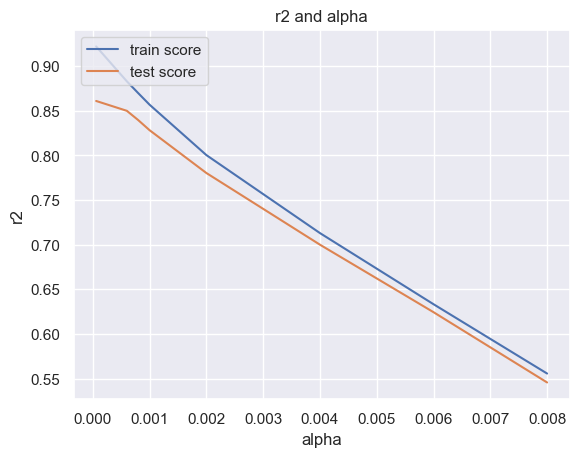

In [70]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
#optimum alpha
alpha =0.00006

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 


Lasso(alpha=6e-05)

In [72]:
lasso.coef_

array([-8.67509696e-03,  6.76767295e-02,  5.13786258e-02,  2.20316970e-02,
       -0.00000000e+00, -0.00000000e+00,  1.29914784e-03,  1.68610465e-02,
        0.00000000e+00,  0.00000000e+00,  8.28985922e-03, -1.21844963e-02,
        2.97875844e-01,  4.44707934e-02,  5.39317276e-03,  5.03130787e-02,
        2.33126730e-02,  1.25279440e-02, -4.88964034e-02,  3.77376096e-02,
        3.37461395e-02, -0.00000000e+00,  6.41993982e-02,  0.00000000e+00,
        2.64477811e-02, -2.85634166e-04,  2.11941767e-02,  1.44489412e-02,
        2.27494421e-02, -4.76550609e-02, -0.00000000e+00, -0.00000000e+00,
       -8.28448580e-03, -1.83847435e-03,  3.22782686e-03, -3.18103165e-02,
        1.23197640e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.09429872e-02,  9.57263575e-03, -6.40179909e-03, -2.29515534e-02,
        9.02400323e-03, -5.33346061e-03,  3.35238562e-03,  0.00000000e+00,
       -3.01728664e-02,  0.00000000e+00, -7.47532890e-03,  9.50107699e-03,
       -1.45566815e-02,  

In [73]:
lasso.score(X_test,y_test)



0.8787972031446633

In [74]:
lasso.score(X_train,y_train)

0.916482528854707

In [75]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 0.372),
 ('LotFrontage', -0.151),
 ('LotArea', -0.074),
 ('YearBuilt', -0.053),
 ('YearRemodAdd', -0.051),
 ('MasVnrArea', -0.05),
 ('BsmtFinSF1', -0.049),
 ('BsmtFinSF2', -0.048),
 ('BsmtUnfSF', -0.037),
 ('TotalBsmtSF', -0.036),
 ('1stFlrSF', -0.032),
 ('2ndFlrSF', -0.03),
 ('LowQualFinSF', -0.029),
 ('GrLivArea', -0.028),
 ('BsmtFullBath', -0.027),
 ('BsmtHalfBath', -0.024),
 ('FullBath', -0.024),
 ('HalfBath', -0.023),
 ('BedroomAbvGr', -0.023),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', -0.021),
 ('Fireplaces', -0.019),
 ('GarageYrBlt', -0.019),
 ('GarageCars', -0.019),
 ('GarageArea', -0.018),
 ('WoodDeckSF', -0.017),
 ('OpenPorchSF', -0.017),
 ('EnclosedPorch', -0.017),
 ('3SsnPorch', -0.016),
 ('ScreenPorch', -0.016),
 ('PoolArea', -0.016),
 ('MiscVal', -0.015),
 ('MoSold', -0.015),
 ('YrSold', -0.015),
 ('SalePrice', -0.013),
 ('YearSinceRemodel', -0.013),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.011),
 ('MS

# SUMMARY

>>>>RIDGE REGRESSION SCORE 
TRAIN:  0.9032332909554525
TEST: 0.8715765655085447
     
>>> LASSO REGRESSION SCORE
TRAIN:  0.916482528854707
TEST: 0.8787972031446633


>>> TOP 5 FEATRUES USING RIDGE REGRESSION ARE
>SaleCondition_Others = 0.057
>GarageFinish_RFn = 0.052
>GarageFinish_Unf = 0.052
>SaleCondition_Normal - 0.052
>GarageFinish_No Garage = 0.048

>>> TOP 5 FEATRUES USING LASSO REGRESSION ARE
> GarageFinish_No Garage', 0.051
>GarageFinish_RFn', 0.066
>GarageFinish_Unf', 0.072
>SaleCondition_Normal', 0.074
>SaleCondition_Others', 0.302


>>> Optimal Value of alpha for ridge =  10
>>> Optimal Value of alpha for LASSO =  0.00006

In [ ]:
# THE OVERALL PERFORMACE OF LASSO REGRESSION IS BETTER THAN RIDGE